In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, StratifiedShuffleSplit
from tensorflow.keras.models import Model
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU, Input, Add, Activation
from tensorflow.keras.optimizers import Adam, Nadam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import auc, precision_score, recall_score, precision_recall_curve, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import cross_val_score
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import optuna.visualization as vis
import matplotlib.pyplot as plt

/Users/shivamsharma/anaconda3/envs/masters/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import optuna
from sklearn.metrics import f1_score

In [3]:
ratio_data = pd.read_csv("ratio.csv")

In [4]:
ratio_data.head()

,index,grp,Age,Gender,D_0__Archaea.D_1__Euryarchaeota.D_2__Methanobacteria.D_3__Methanobacteriales.D_4__Methanobacteriaceae,D_0__Bacteria.D_1__Actinobacteria.D_2__Actinobacteria.D_3__Actinomycetales.D_4__Actinomycetaceae,D_0__Bacteria.D_1__Actinobacteria.D_2__Actinobacteria.D_3__Bifidobacteriales.D_4__Bifidobacteriaceae,D_0__Bacteria.D_1__Actinobacteria.D_2__Actinobacteria.D_3__Corynebacteriales.D_4__Corynebacteriaceae,D_0__Bacteria.D_1__Actinobacteria.D_2__Actinobacteria.D_3__Micrococcales.D_4__Micrococcaceae,D_0__Bacteria.D_1__Actinobacteria.D_2__Coriobacteriia.D_3__Coriobacteriales.D_4__Coriobacteriaceae,...,D_0__Bacteria.D_1__Proteobacteria.D_2__Betaproteobacteria.D_3__Burkholderiales.D_4__Alcaligenaceae,D_0__Bacteria.D_1__Proteobacteria.D_2__Betaproteobacteria.D_3__Burkholderiales.D_4__Oxalobacteraceae,D_0__Bacteria.D_1__Proteobacteria.D_2__Deltaproteobacteria.D_3__Desulfovibrionales.D_4__Desulfovibrionaceae,D_0__Bacteria.D_1__Proteobacteria.D_2__Gammaproteobacteria.D_3__Aeromonadales.D_4__Succinivibrionaceae,D_0__Bacteria.D_1__Proteobacteria.D_2__Gammaproteobacteria.D_3__Enterobacteriales.D_4__Enterobacteriaceae,D_0__Bacteria.D_1__Proteobacteria.D_2__Gammaproteobacteria.D_3__Pasteurellales.D_4__Pasteurellaceae,D_0__Bacteria.D_1__Proteobacteria.D_2__Gammaproteobacteria.D_3__Pseudomonadales.D_4__Pseudomonadaceae,D_0__Bacteria.D_1__Synergistetes.D_2__Synergistia.D_3__Synergistales.D_4__Synergistaceae,D_0__Bacteria.D_1__Tenericutes.D_2__Mollicutes.D_3__Mollicutes.RF9.D_4__uncultured.bacterium,D_0__Bacteria.D_1__Verrucomicrobia.D_2__Verrucomicrobiae.D_3__Verrucomicrobiales.D_4__Verrucomicrobiaceae
0,1002P,normal_colonoscopy,60,Male,0.00029,0.000168,0.002133,0.000000,0.0,0.010785,...,0.023132,0.000234,0.003648,0.024236,0.003349,0.000253,0.0,0.0,0.000000,0.000243
1,100N,negative,64,Female,0.00000,0.000259,0.019011,0.000016,0.0,0.009317,...,0.017717,0.000000,0.011995,0.000086,0.001401,0.000291,0.0,0.0,0.000000,0.000054
2,100P,cancer,64,Male,0.00000,0.000000,0.006305,0.000000,0.0,0.001446,...,0.014076,0.000000,0.001028,0.000062,0.106577,0.000171,0.0,0.0,0.000000,0.000110
3,101N,negative,60,Female,0.00000,0.000148,0.021590,0.000000,0.0,0.010218,...,0.011911,0.000000,0.003778,0.000026,0.001001,0.000083,0.0,0.0,0.000000,0.000103
4,101P,normal_colonoscopy,67,Female,0.00000,0.000131,0.072117,0.000000,0.0,0.036632,...,0.042356,0.000000,0.001630,0.000000,0.126520,0.001965,0.0,0.0,0.000025,0.000188


In [9]:
import skbio.diversity

In [11]:
data = pd.read_csv('filtered.csv')

In [16]:
# Identify microbiome columns
microbiome_data = data.drop(columns=['index', 'Age', 'Gender', 'grp'])

In [157]:
microbiome_data.head()

,D_0__Archaea.D_1__Euryarchaeota.D_2__Methanobacteria.D_3__Methanobacteriales.D_4__Methanobacteriaceae,D_0__Bacteria.D_1__Actinobacteria.D_2__Actinobacteria.D_3__Actinomycetales.D_4__Actinomycetaceae,D_0__Bacteria.D_1__Actinobacteria.D_2__Actinobacteria.D_3__Bifidobacteriales.D_4__Bifidobacteriaceae,D_0__Bacteria.D_1__Actinobacteria.D_2__Actinobacteria.D_3__Corynebacteriales.D_4__Corynebacteriaceae,D_0__Bacteria.D_1__Actinobacteria.D_2__Actinobacteria.D_3__Micrococcales.D_4__Micrococcaceae,D_0__Bacteria.D_1__Actinobacteria.D_2__Coriobacteriia.D_3__Coriobacteriales.D_4__Coriobacteriaceae,D_0__Bacteria.D_1__Bacteroidetes.D_2__Bacteroidia.D_3__Bacteroidales.D_4__Bacteroidaceae,D_0__Bacteria.D_1__Bacteroidetes.D_2__Bacteroidia.D_3__Bacteroidales.D_4__Bacteroidales.S24.7.group,D_0__Bacteria.D_1__Bacteroidetes.D_2__Bacteroidia.D_3__Bacteroidales.D_4__Porphyromonadaceae,D_0__Bacteria.D_1__Bacteroidetes.D_2__Bacteroidia.D_3__Bacteroidales.D_4__Prevotellaceae,...,D_0__Bacteria.D_1__Proteobacteria.D_2__Betaproteobacteria.D_3__Burkholderiales.D_4__Alcaligenaceae,D_0__Bacteria.D_1__Proteobacteria.D_2__Betaproteobacteria.D_3__Burkholderiales.D_4__Oxalobacteraceae,D_0__Bacteria.D_1__Proteobacteria.D_2__Deltaproteobacteria.D_3__Desulfovibrionales.D_4__Desulfovibrionaceae,D_0__Bacteria.D_1__Proteobacteria.D_2__Gammaproteobacteria.D_3__Aeromonadales.D_4__Succinivibrionaceae,D_0__Bacteria.D_1__Proteobacteria.D_2__Gammaproteobacteria.D_3__Enterobacteriales.D_4__Enterobacteriaceae,D_0__Bacteria.D_1__Proteobacteria.D_2__Gammaproteobacteria.D_3__Pasteurellales.D_4__Pasteurellaceae,D_0__Bacteria.D_1__Proteobacteria.D_2__Gammaproteobacteria.D_3__Pseudomonadales.D_4__Pseudomonadaceae,D_0__Bacteria.D_1__Synergistetes.D_2__Synergistia.D_3__Synergistales.D_4__Synergistaceae,D_0__Bacteria.D_1__Tenericutes.D_2__Mollicutes.D_3__Mollicutes.RF9.D_4__uncultured.bacterium,D_0__Bacteria.D_1__Verrucomicrobia.D_2__Verrucomicrobiae.D_3__Verrucomicrobiales.D_4__Verrucomicrobiaceae
0,31,18,228,0,0,1153,3352,1939,5663,47156,...,2473,25,390,2591,358,27,0,0,0,26
1,0,48,3528,3,0,1729,27968,0,7660,310,...,3288,0,2226,16,260,54,0,0,0,10
2,0,0,920,0,0,211,54008,12,8303,6572,...,2054,0,150,9,15552,25,0,0,0,16
3,0,23,3366,0,0,1593,36097,0,3853,271,...,1857,0,589,4,156,13,0,0,0,16
4,0,16,8806,0,0,4473,20274,13,3576,2127,...,5172,0,199,0,15449,240,0,0,3,23


In [18]:
alpha_diversity_shannon = microbiome_data.apply(skbio.diversity.alpha.shannon, axis=1)

In [25]:
alpha_diversity_shannon

0       1.870827
1       1.990103
2       1.734662
3       1.753496
4       2.328421
          ...   
2247    1.795535
2248    1.958123
2249    1.701879
2250    2.096990
2251    2.127751
Length: 2252, dtype: float64

In [161]:
print(alpha_diversity_shannon.mean())
print(alpha_diversity_shannon.std())

1.8223792393452907
0.2811458681449509


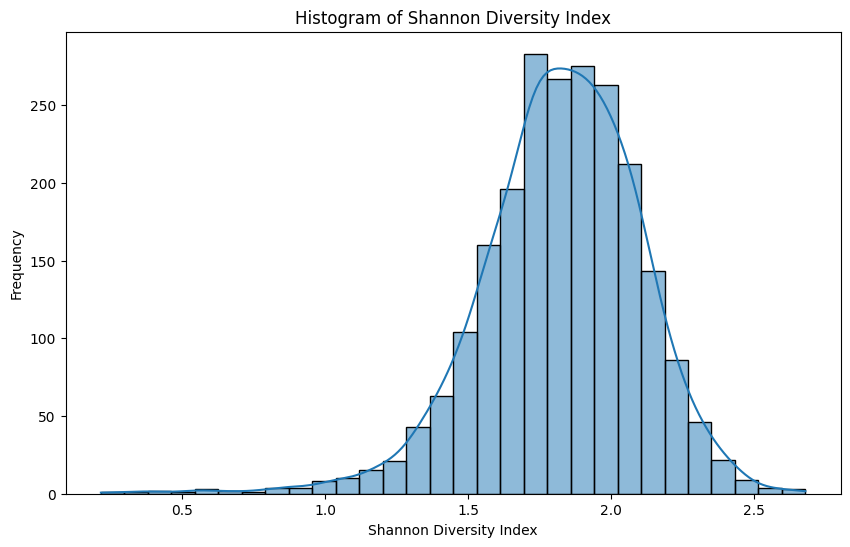

In [26]:
# Histogram of Shannon Diversity Index
plt.figure(figsize=(10, 6))
sns.histplot(alpha_diversity_shannon, kde=True, bins=30)
plt.title('Histogram of Shannon Diversity Index')
plt.xlabel('Shannon Diversity Index')
plt.ylabel('Frequency')
plt.show()

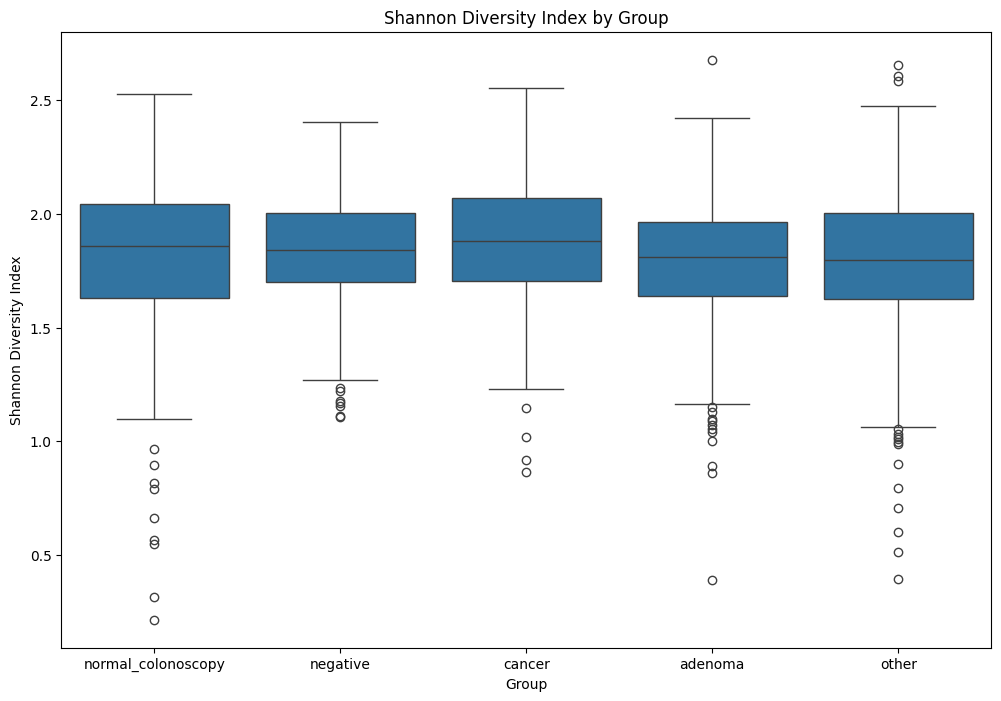

In [57]:
# Combine alpha diversity values with the original data to use group information
test_data = data
test_data['grp'] = test_data['grp'].replace({'low': 'adenoma', 'intermediate': 'adenoma', 'high': 'adenoma'})
test_data['Shannon Diversity Index'] = alpha_diversity_shannon

# Box plot of Shannon Diversity Index by group
plt.figure(figsize=(12, 8))
sns.boxplot(x='grp', y='Shannon Diversity Index', data=test_data)
plt.title('Shannon Diversity Index by Group')
plt.xlabel('Group')
plt.ylabel('Shannon Diversity Index')
plt.show()

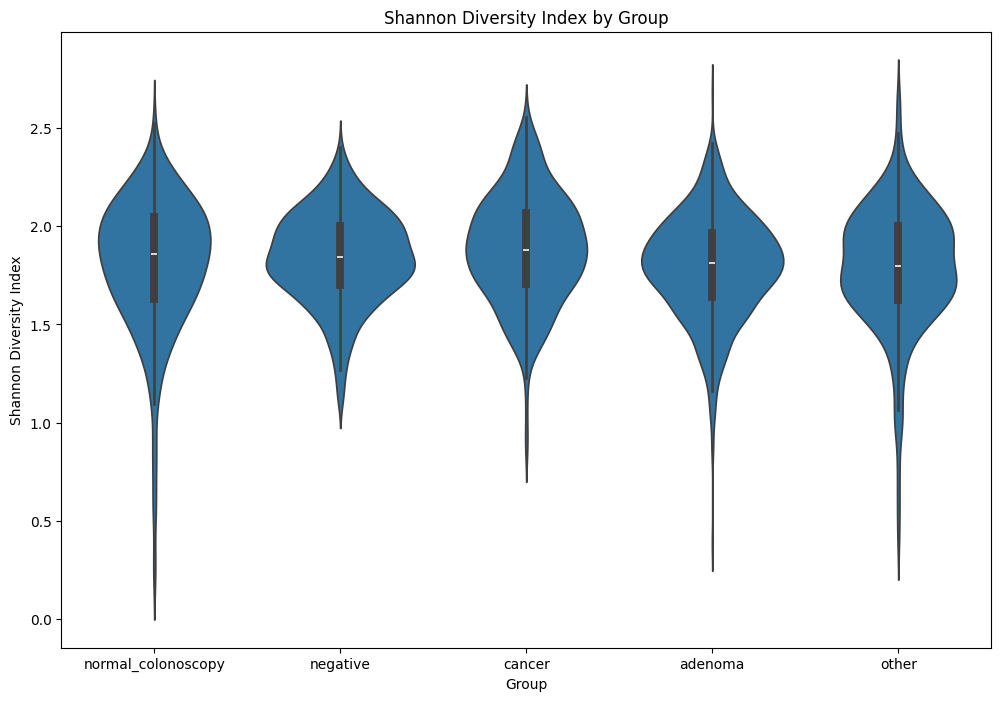

In [58]:
# Violin plot of Shannon Diversity Index by group
plt.figure(figsize=(12, 8))
sns.violinplot(x='grp', y='Shannon Diversity Index', data=test_data)
plt.title('Shannon Diversity Index by Group')
plt.xlabel('Group')
plt.ylabel('Shannon Diversity Index')
plt.show()

In [175]:
# Calculate mean, median, and mode for each group
mean_shannon = test_data.groupby('grp')['Shannon Diversity Index'].mean()
median_shannon = test_data.groupby('grp')['Shannon Diversity Index'].median()
mode_shannon = test_data.groupby('grp')['Shannon Diversity Index'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else float('nan'))

# Combine results into a single DataFrame
statistics_df = pd.DataFrame({
    'Mean Shannon Index': mean_shannon,
    'Median Shannon Index': median_shannon,
    'Mode Shannon Index': mode_shannon
})

# Display the results
print(statistics_df)

                    Mean Shannon Index  Median Shannon Index  \
grp                                                            
adenoma                       1.794173              1.811657   
cancer                        1.884239              1.880966   
negative                      1.838860              1.840855   
normal_colonoscopy            1.805913              1.857718   
other                         1.792339              1.796881   

                    Mode Shannon Index  
grp                                     
adenoma                       0.390115  
cancer                        0.863512  
negative                      1.106315  
normal_colonoscopy            0.214767  
other                         0.392459  


In [162]:
from scipy.stats import kruskal

In [165]:
groups = test_data['grp'].unique()

In [169]:
data_by_group = [test_data.loc[test_data['grp'] == group, 'Shannon Diversity Index'] for group in groups]

In [171]:
# Perform the Kruskal-Wallis test
kruskal_stat, kruskal_p_value = kruskal(*data_by_group)

print(f"Kruskal-Wallis test statistic: {kruskal_stat}")
print(f"P-value: {kruskal_p_value}")

Kruskal-Wallis test statistic: 30.109002322079505
P-value: 4.6506112071232675e-06


In [172]:
# Calculate eta squared (η²) effect size for Kruskal-Wallis
n = len(test_data)
eta_squared = (kruskal_stat - len(groups) + 1) / (n - len(groups))

print(f"Effect Size (Eta Squared): {eta_squared}")

Effect Size (Eta Squared): 0.011619493690289055


Beta Diversity Analysis

In [29]:
from skbio.diversity import beta_diversity
from skbio.stats.ordination import pcoa




/Users/shivamsharma/anaconda3/envs/masters/lib/python3.11/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:146: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -5.265450057018601 and the largest is 70.68287500562883.
  warn(


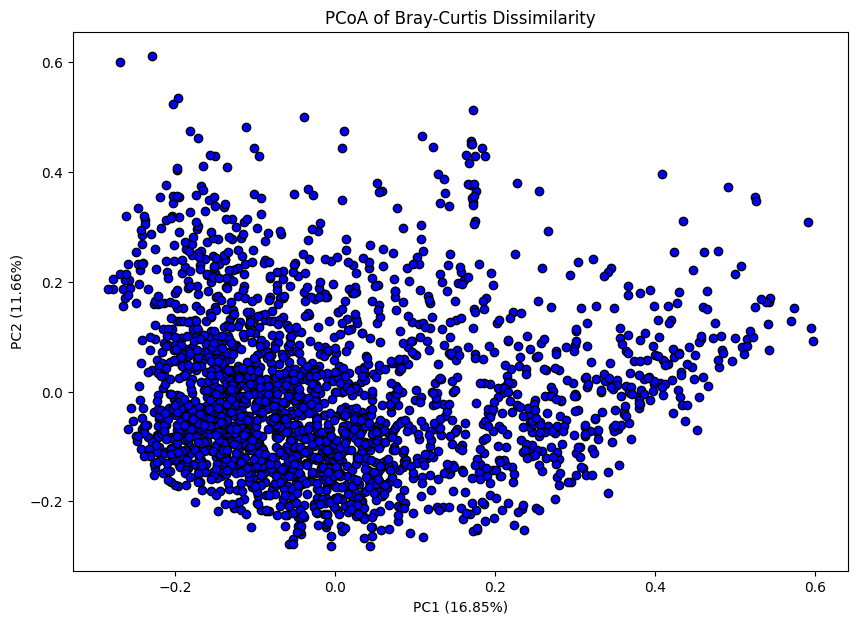

In [65]:
# Calculate the Bray-Curtis dissimilarity matrix
bray_curtis_dm = beta_diversity('braycurtis', microbiome_data, data.index)

# Perform PCoA
pcoa_results = pcoa(bray_curtis_dm)

# Plot the PCoA results
plt.figure(figsize=(10, 7))
plt.scatter(pcoa_results.samples['PC1'], pcoa_results.samples['PC2'], c='blue', edgecolor='k')
plt.xlabel(f'PC1 ({pcoa_results.proportion_explained.iloc[0] * 100:.2f}%)')
plt.ylabel(f'PC2 ({pcoa_results.proportion_explained.iloc[1] * 100:.2f}%)')
plt.title('PCoA of Bray-Curtis Dissimilarity')
plt.show()

In [66]:
# Assuming 'metadata' is a DataFrame containing your metadata with a 'Group' column
metadata = test_data[['grp']]  # Replace 'Group' with the actual column name if different

# Ensure the metadata indices match the indices of the pcoa_results.samples
metadata = metadata.loc[pcoa_results.samples.index]

In [67]:
# Add metadata to the pcoa results
pcoa_results.samples['grp'] = metadata['grp'].values

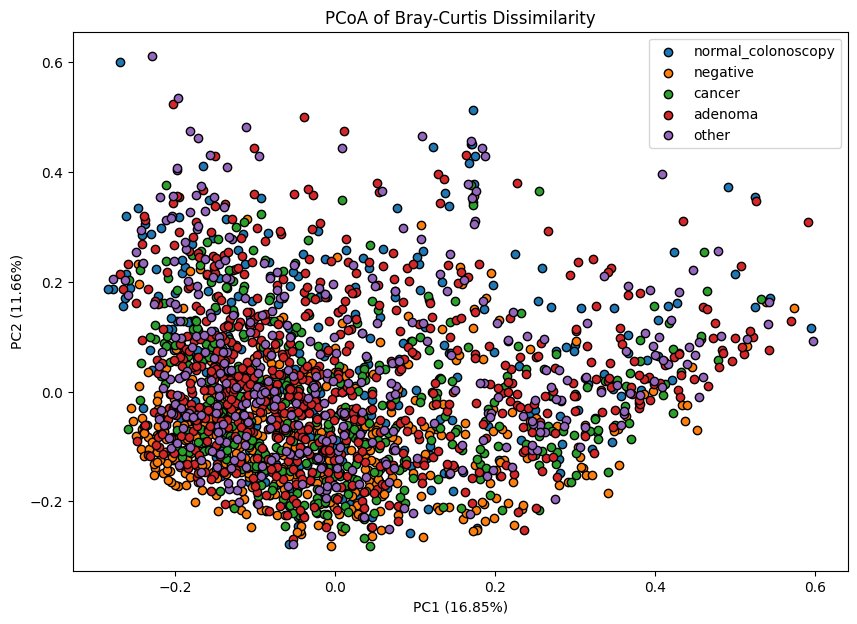

In [68]:
# Plot the PCoA results with color-coding by 'grp'
plt.figure(figsize=(10, 7))
unique_groups = pcoa_results.samples['grp'].unique()
colors = plt.cm.tab10(range(len(unique_groups)))  # Using a colormap with distinct colors

for group, color in zip(unique_groups, colors):
    subset = pcoa_results.samples[pcoa_results.samples['grp'] == group]
    plt.scatter(subset['PC1'], subset['PC2'], color=color, label=group, edgecolor='k')

plt.xlabel(f'PC1 ({pcoa_results.proportion_explained.iloc[0] * 100:.2f}%)')
plt.ylabel(f'PC2 ({pcoa_results.proportion_explained.iloc[1] * 100:.2f}%)')
plt.title('PCoA of Bray-Curtis Dissimilarity')
plt.legend()
plt.show()

In [53]:
from skbio.stats.distance import permanova

In [69]:
# Perform PERMANOVA
distance_matrix = beta_diversity('braycurtis', microbiome_data, ids=microbiome_data.index)

results = permanova(distance_matrix, test_data['grp'], permutations=999)
print(results)

method name               PERMANOVA
test statistic name        pseudo-F
sample size                    2252
number of groups                  5
test statistic            15.838802
p-value                       0.001
number of permutations          999
Name: PERMANOVA results, dtype: object


Interpretation of PERMANOVA Results


Method Name: PERMANOVA:
This indicates that the method used is PERMANOVA, which is appropriate for comparing the differences in multivariate data (like microbial composition) between groups.

Test Statistic Name: pseudo-F:
The test statistic used is the pseudo-F statistic, which is similar to the F-statistic used in traditional ANOVA but is adapted for multivariate data.

Sample Size: 2252:
This is the total number of samples included in the analysis.

Number of Groups: 5:
The number of groups (or categories) in your data that you are comparing. In your case, you have seven different groups (e.g., normal_colonoscopy, negative, cancer, high, intermediate, low, other).

Test Statistic: 15.838802:
This is the value of the pseudo-F statistic. A higher value suggests a greater degree of difference between the groups.

p-value: 0.001:
The p-value indicates the probability that the observed differences between groups occurred by chance. In your case, a p-value of 0.001 suggests that there is a 0.1% probability that the observed differences are due to random variation, which is highly significant.

Number of Permutations: 999:
This indicates the number of permutations used to calculate the p-value. Permutations are a key component of PERMANOVA, allowing for robust statistical inference without relying on normality assumptions.

What Does This Mean for my Data?
Significant Differences: The very low p-value (0.001) indicates that there are statistically significant differences in the microbial compositions between your seven groups. This means that the microbial communities differ more than would be expected by random chance.

Effect Size: The pseudo-F statistic value of 15.838802 suggests that the differences between groups are meaningful. However, PERMANOVA does not directly provide effect sizes like some other statistical tests. The magnitude of the pseudo-F value should be interpreted in the context of your specific dataset and research question.

In [55]:
from itertools import combinations

In [70]:
groups = test_data['grp'].unique()
pairwise_results = {}

for group1, group2 in combinations(groups, 2):
    subset_data = test_data[(test_data['grp'] == group1) | (test_data['grp'] == group2)]
    subset_microbiome = microbiome_data.loc[subset_data.index]
    distance_matrix = beta_diversity('braycurtis', subset_microbiome, ids=subset_microbiome.index)
    result = permanova(distance_matrix, subset_data['grp'], permutations=999)
    pairwise_results[(group1, group2)] = result

# Print pairwise PERMANOVA results
for groups, result in pairwise_results.items():
    print(f"Comparison: {groups}")
    print(result)

Comparison: ('normal_colonoscopy', 'negative')
method name               PERMANOVA
test statistic name        pseudo-F
sample size                     791
number of groups                  2
test statistic            34.153133
p-value                       0.001
number of permutations          999
Name: PERMANOVA results, dtype: object
Comparison: ('normal_colonoscopy', 'cancer')
method name               PERMANOVA
test statistic name        pseudo-F
sample size                     730
number of groups                  2
test statistic            11.042774
p-value                       0.001
number of permutations          999
Name: PERMANOVA results, dtype: object
Comparison: ('normal_colonoscopy', 'adenoma')
method name               PERMANOVA
test statistic name        pseudo-F
sample size                     965
number of groups                  2
test statistic               5.0258
p-value                       0.001
number of permutations          999
Name: PERMANOVA results, dty

Interpretation of Pairwise PERMANOVA Results
The pairwise PERMANOVA results provide insights into the differences in microbial composition between each pair of groups in your dataset. Here's a detailed breakdown of what each result means:

Comparison: ('normal_colonoscopy', 'negative')
Test Statistic (pseudo-F): 34.153133
p-value: 0.001
Interpretation: There is a significant difference in microbial composition between the 'normal_colonoscopy' and 'negative' groups. The high pseudo-F value indicates a substantial difference between these groups.
Comparison: ('normal_colonoscopy', 'cancer')
Test Statistic (pseudo-F): 11.042774
p-value: 0.001
Interpretation: There is a significant difference in microbial composition between the 'normal_colonoscopy' and 'cancer' groups. The pseudo-F value indicates that the differences are meaningful but less pronounced compared to the 'normal_colonoscopy' vs. 'negative' comparison.
Comparison: ('normal_colonoscopy', 'adenoma')
Test Statistic (pseudo-F): 5.0258
p-value: 0.001
Interpretation: There is a significant difference in microbial composition between the 'normal_colonoscopy' and 'adenoma' groups. However, the pseudo-F value is lower, indicating that the difference is less substantial compared to the previous comparisons.
Comparison: ('normal_colonoscopy', 'other')
Test Statistic (pseudo-F): 1.885128
p-value: 0.062
Interpretation: There is no significant difference in microbial composition between the 'normal_colonoscopy' and 'other' groups, as indicated by the p-value being above the 0.05 significance threshold.
Comparison: ('negative', 'cancer')
Test Statistic (pseudo-F): 16.947935
p-value: 0.001
Interpretation: There is a significant difference in microbial composition between the 'negative' and 'cancer' groups. The relatively high pseudo-F value indicates meaningful differences.
Comparison: ('negative', 'adenoma')
Test Statistic (pseudo-F): 39.366034
p-value: 0.001
Interpretation: There is a significant difference in microbial composition between the 'negative' and 'adenoma' groups. The very high pseudo-F value suggests substantial differences.
Comparison: ('negative', 'other')
Test Statistic (pseudo-F): 35.974632
p-value: 0.001
Interpretation: There is a significant difference in microbial composition between the 'negative' and 'other' groups. The high pseudo-F value indicates substantial differences.
Comparison: ('cancer', 'adenoma')
Test Statistic (pseudo-F): 6.500141
p-value: 0.001
Interpretation: There is a significant difference in microbial composition between the 'cancer' and 'adenoma' groups. The pseudo-F value indicates a moderate level of difference.
Comparison: ('cancer', 'other')
Test Statistic (pseudo-F): 9.087332
p-value: 0.001
Interpretation: There is a significant difference in microbial composition between the 'cancer' and 'other' groups. The pseudo-F value suggests meaningful differences.
Comparison: ('adenoma', 'other')
Test Statistic (pseudo-F): 2.297225
p-value: 0.031
Interpretation: There is a significant difference in microbial composition between the 'adenoma' and 'other' groups, though the pseudo-F value is relatively low, indicating smaller differences.
What Does This Mean for Your Data?
Significant Group Differences: Most of the comparisons show significant differences in microbial composition between the groups, as indicated by the low p-values (0.001).
Magnitude of Differences: The pseudo-F values vary, indicating that the magnitude of the differences between groups is not uniform. Higher pseudo-F values suggest more substantial differences in microbial composition.
Non-significant Comparison: The comparison between 'normal_colonoscopy' and 'other' groups did not show significant differences, suggesting that these groups may have more similar microbial compositions.
Application to Your Data
Identify Key Groups: The significant differences between groups can help identify which conditions (e.g., cancer, adenoma) are associated with distinct microbial profiles compared to others.
Biomarker Discovery: Understanding these differences can aid in identifying potential microbial biomarkers for different conditions, which could be used for diagnostic or prognostic purposes.
Further Analysis: You may want to explore which specific microbial taxa contribute to the observed differences between groups. Techniques like differential abundance analysis can help with this.


Differential Abundance Analysis

In [71]:
from scipy.stats import mannwhitneyu

In [72]:
metadata = test_data[['grp']]

CANCER VS NEGATIVE


In [91]:

# Function to perform Wilcoxon rank-sum test
def perform_wilcoxon(group1, group2):
    results = []
    for col in microbiome_data.columns:
        stat, p_value = mannwhitneyu(group1[col], group2[col])
        results.append((col, stat, p_value))
    return pd.DataFrame(results, columns=['Feature', 'Statistic', 'p-value'])

In [92]:
# Group data by 'grp' (example: 'normal_colonoscopy' vs. 'cancer')
group1 = microbiome_data[metadata['grp'] == 'cancer']
group2 = microbiome_data[metadata['grp'] == 'negative']

In [100]:
# Perform the test
diff_abundance_results = perform_wilcoxon(group1, group2)

# Adjust p-values for multiple testing (Bonferroni correction)
diff_abundance_results['adjusted_p-value'] = diff_abundance_results['p-value'] * len(diff_abundance_results)

# Filter significant results
significant_results = diff_abundance_results[diff_abundance_results['adjusted_p-value'] < 0.05]

# Sort by p-value
significant_results = significant_results.sort_values('adjusted_p-value')

In [102]:
pd.set_option('display.max_colwidth', None)
significant_results

,Feature,Statistic,p-value,adjusted_p-value
33,D_0__Bacteria.D_1__Fusobacteria.D_2__Fusobacteriia.D_3__Fusobacteriales.D_4__Fusobacteriaceae,144312.0,1.034699e-27,4.863085e-26
12,D_0__Bacteria.D_1__Firmicutes.D_2__Bacilli.D_3__Bacillales.D_4__Family.X,131599.5,7.978061e-26,3.749689e-24
13,D_0__Bacteria.D_1__Firmicutes.D_2__Bacilli.D_3__Bacillales.D_4__Family.XI,131599.5,7.978061e-26,3.749689e-24
28,D_0__Bacteria.D_1__Firmicutes.D_2__Clostridia.D_3__Clostridiales.D_4__Ruminococcaceae,63601.5,2.035537e-25,9.567024e-24
14,D_0__Bacteria.D_1__Firmicutes.D_2__Bacilli.D_3__Lactobacillales.D_4__Carnobacteriaceae,118004.0,3.246455e-08,1.525834e-06
26,D_0__Bacteria.D_1__Firmicutes.D_2__Clostridia.D_3__Clostridiales.D_4__Peptococcaceae,87198.0,2.628506e-06,1.235398e-04
18,D_0__Bacteria.D_1__Firmicutes.D_2__Clostridia.D_3__Clostridiales.D_4__Christensenellaceae,87195.0,5.094150e-06,2.394251e-04
20,D_0__Bacteria.D_1__Firmicutes.D_2__Clostridia.D_3__Clostridiales.D_4__Clostridiales.vadinBB60.group,88851.5,3.174964e-05,1.492233e-03
3,D_0__Bacteria.D_1__Actinobacteria.D_2__Actinobacteria.D_3__Corynebacteriales.D_4__Corynebacteriaceae,113377.0,5.904487e-05,2.775109e-03
46,D_0__Bacteria.D_1__Verrucomicrobia.D_2__Verrucomicrobiae.D_3__Verrucomicrobiales.D_4__Verrucomicrobiaceae,90470.0,1.698385e-04,7.982410e-03


In [156]:
# Visualize the top 10 significant features
top_features = significant_results.head(10)
top_features

,Feature,Statistic,p-value,adjusted_p-value
33,D_0__Bacteria.D_1__Fusobacteria.D_2__Fusobacteriia.D_3__Fusobacteriales.D_4__Fusobacteriaceae,144312.0,1.034699e-27,4.863085e-26
12,D_0__Bacteria.D_1__Firmicutes.D_2__Bacilli.D_3__Bacillales.D_4__Family.X,131599.5,7.978061e-26,3.749689e-24
13,D_0__Bacteria.D_1__Firmicutes.D_2__Bacilli.D_3__Bacillales.D_4__Family.XI,131599.5,7.978061e-26,3.749689e-24
28,D_0__Bacteria.D_1__Firmicutes.D_2__Clostridia.D_3__Clostridiales.D_4__Ruminococcaceae,63601.5,2.035537e-25,9.567024e-24
14,D_0__Bacteria.D_1__Firmicutes.D_2__Bacilli.D_3__Lactobacillales.D_4__Carnobacteriaceae,118004.0,3.246455e-08,1.525834e-06
26,D_0__Bacteria.D_1__Firmicutes.D_2__Clostridia.D_3__Clostridiales.D_4__Peptococcaceae,87198.0,2.628506e-06,1.235398e-04
18,D_0__Bacteria.D_1__Firmicutes.D_2__Clostridia.D_3__Clostridiales.D_4__Christensenellaceae,87195.0,5.094150e-06,2.394251e-04
20,D_0__Bacteria.D_1__Firmicutes.D_2__Clostridia.D_3__Clostridiales.D_4__Clostridiales.vadinBB60.group,88851.5,3.174964e-05,1.492233e-03
3,D_0__Bacteria.D_1__Actinobacteria.D_2__Actinobacteria.D_3__Corynebacteriales.D_4__Corynebacteriaceae,113377.0,5.904487e-05,2.775109e-03
46,D_0__Bacteria.D_1__Verrucomicrobia.D_2__Verrucomicrobiae.D_3__Verrucomicrobiales.D_4__Verrucomicrobiaceae,90470.0,1.698385e-04,7.982410e-03


In [187]:
groups_to_compare = ['cancer', 'negative']

In [188]:
# Visualize the top 10 significant features
feature = top_features['Feature']
feature

33                D_0__Bacteria.D_1__Fusobacteria.D_2__Fusobacteriia.D_3__Fusobacteriales.D_4__Fusobacteriaceae
12                                     D_0__Bacteria.D_1__Firmicutes.D_2__Bacilli.D_3__Bacillales.D_4__Family.X
13                                    D_0__Bacteria.D_1__Firmicutes.D_2__Bacilli.D_3__Bacillales.D_4__Family.XI
28                        D_0__Bacteria.D_1__Firmicutes.D_2__Clostridia.D_3__Clostridiales.D_4__Ruminococcaceae
14                       D_0__Bacteria.D_1__Firmicutes.D_2__Bacilli.D_3__Lactobacillales.D_4__Carnobacteriaceae
26                         D_0__Bacteria.D_1__Firmicutes.D_2__Clostridia.D_3__Clostridiales.D_4__Peptococcaceae
18                    D_0__Bacteria.D_1__Firmicutes.D_2__Clostridia.D_3__Clostridiales.D_4__Christensenellaceae
20          D_0__Bacteria.D_1__Firmicutes.D_2__Clostridia.D_3__Clostridiales.D_4__Clostridiales.vadinBB60.group
3          D_0__Bacteria.D_1__Actinobacteria.D_2__Actinobacteria.D_3__Corynebacteriales.D_4__Corynebacte

In [189]:
def plot_bar(microbiome_data, metadata, significant_taxa, groups_to_compare):
    filtered_metadata = metadata[metadata['grp'].isin(groups_to_compare)]
    filtered_microbiome_data = microbiome_data.loc[filtered_metadata.index]
    matched_taxa = [taxa for taxa in significant_taxa if taxa in filtered_microbiome_data.columns]

    for taxa in matched_taxa:
        plt.figure(figsize=(10, 6))
        sns.barplot(x='grp', y=taxa, data=pd.concat([filtered_microbiome_data[taxa], filtered_metadata['grp']], axis=1), estimator=np.mean)
        plt.title(f'Mean Abundance of {taxa}')
        plt.ylabel('Mean Abundance')
        plt.xlabel('Group')
        plt.xticks(rotation=45)
        plt.show()



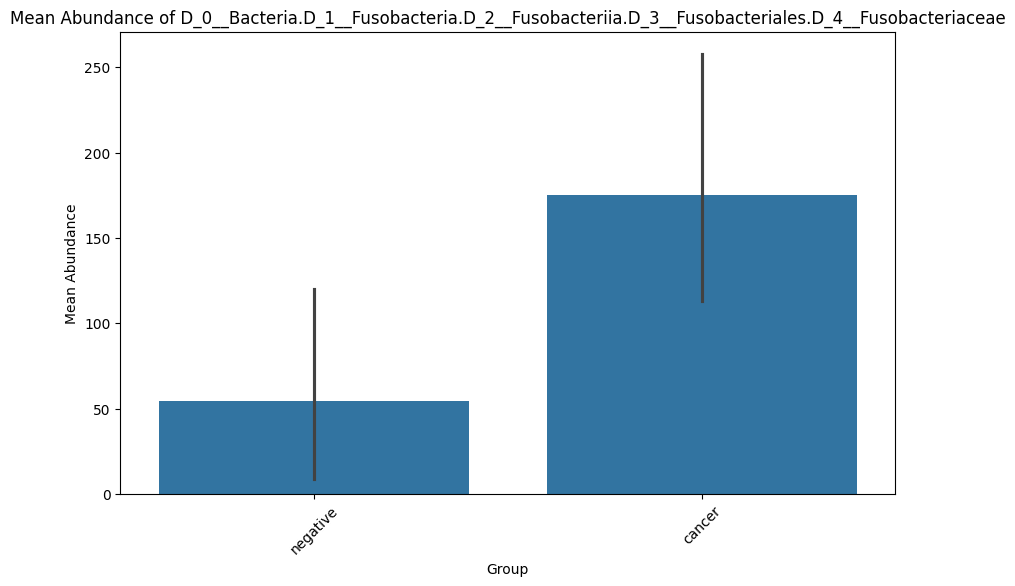

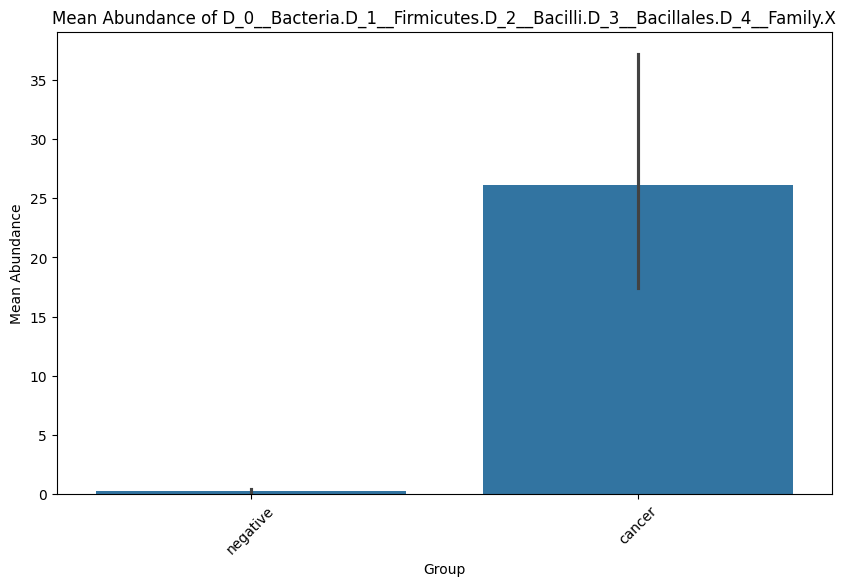

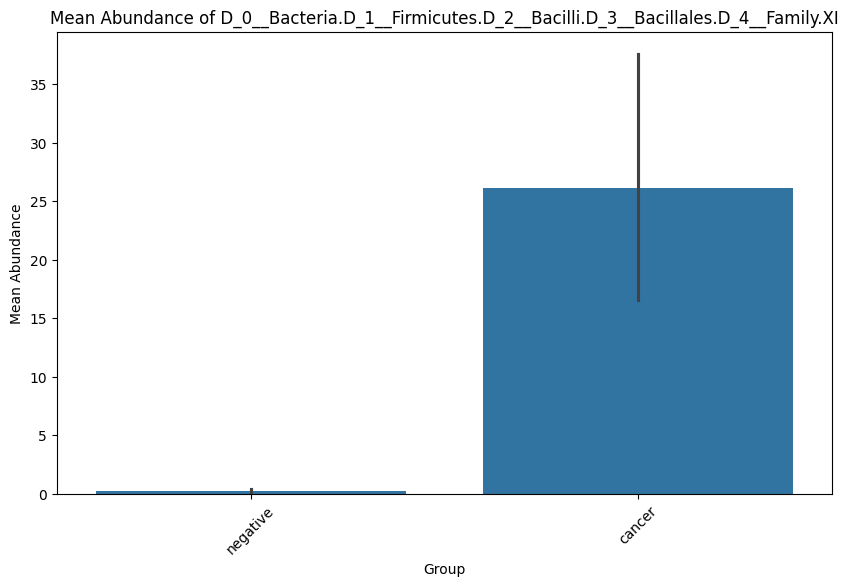

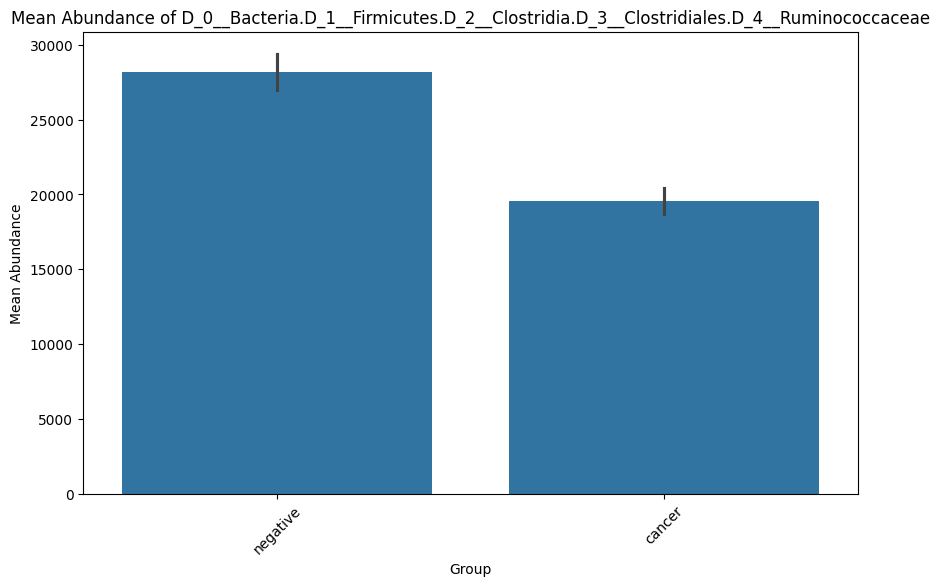

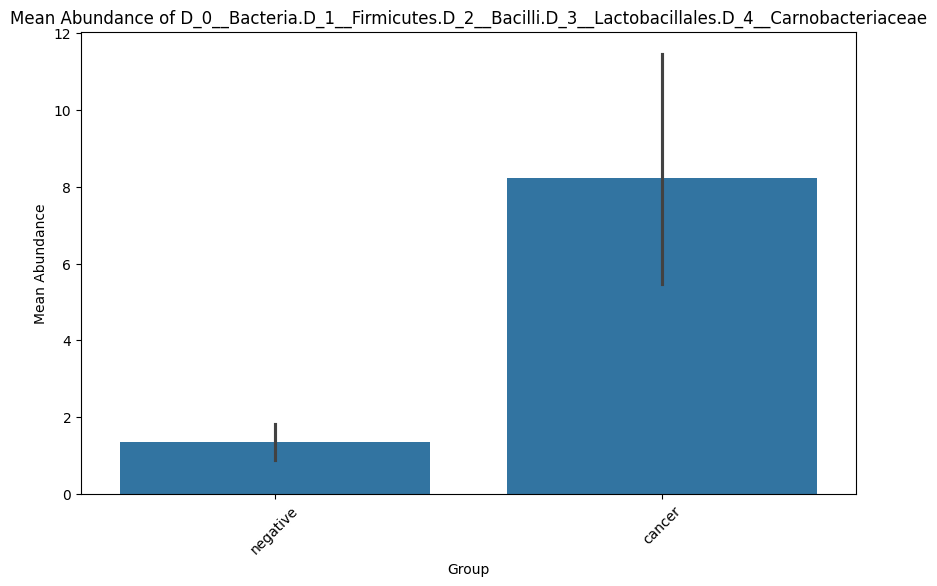

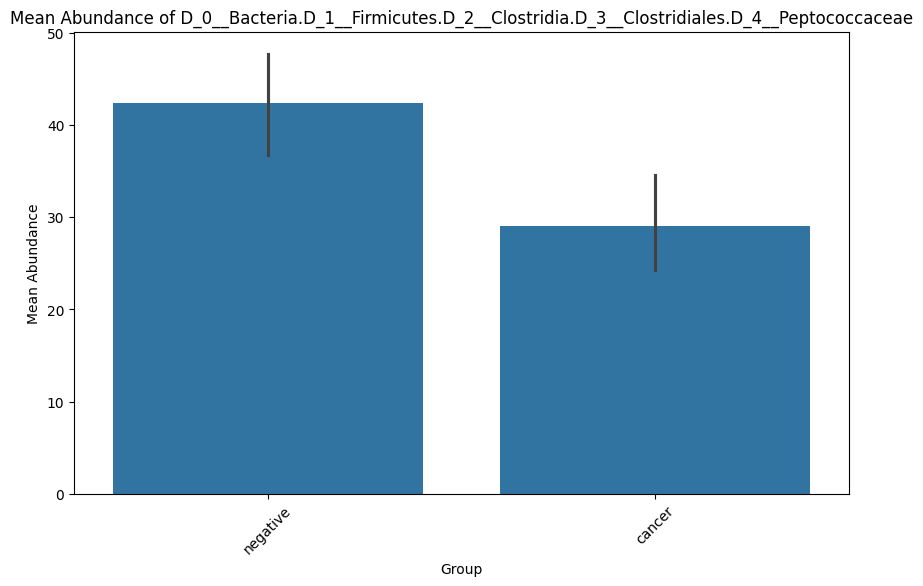

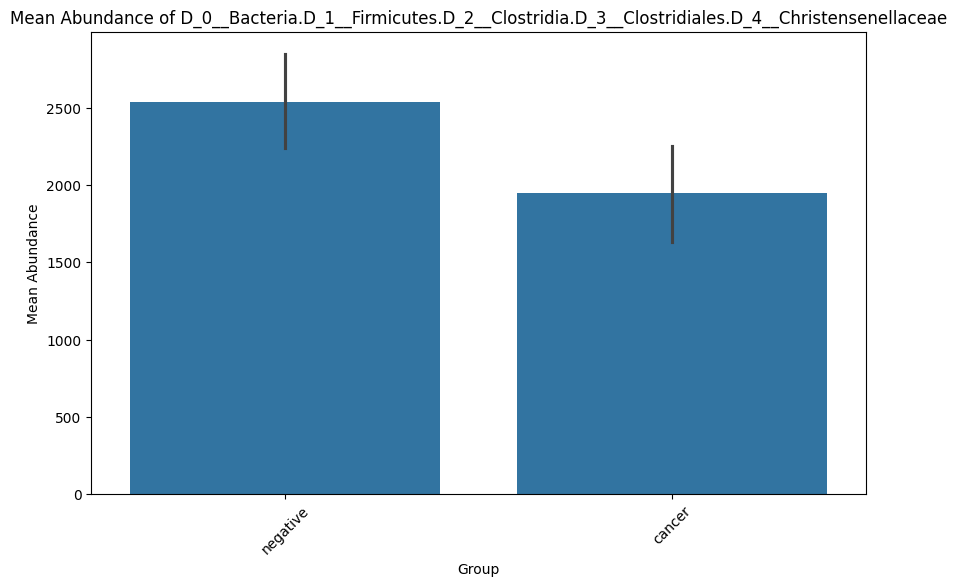

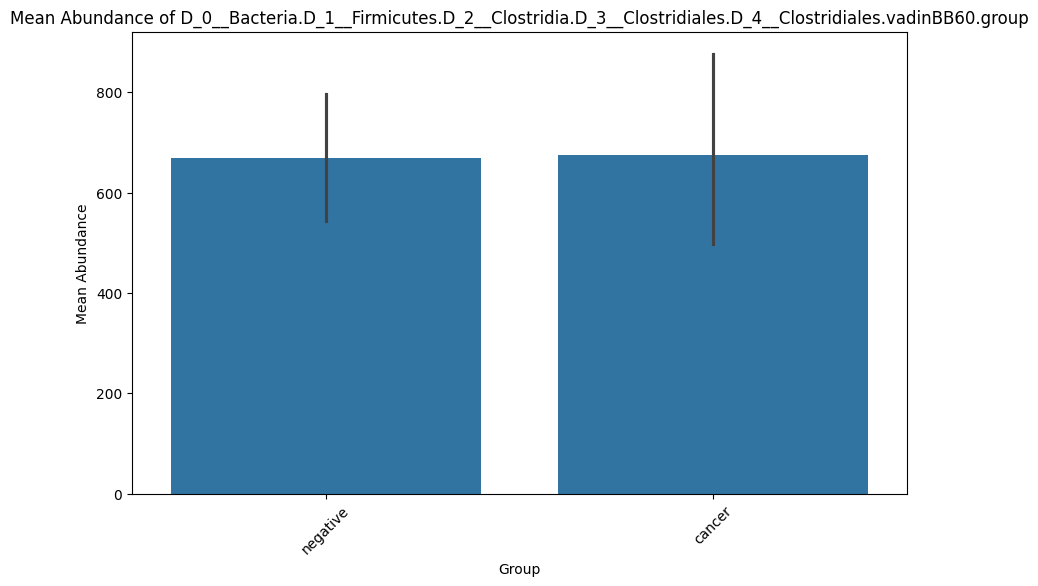

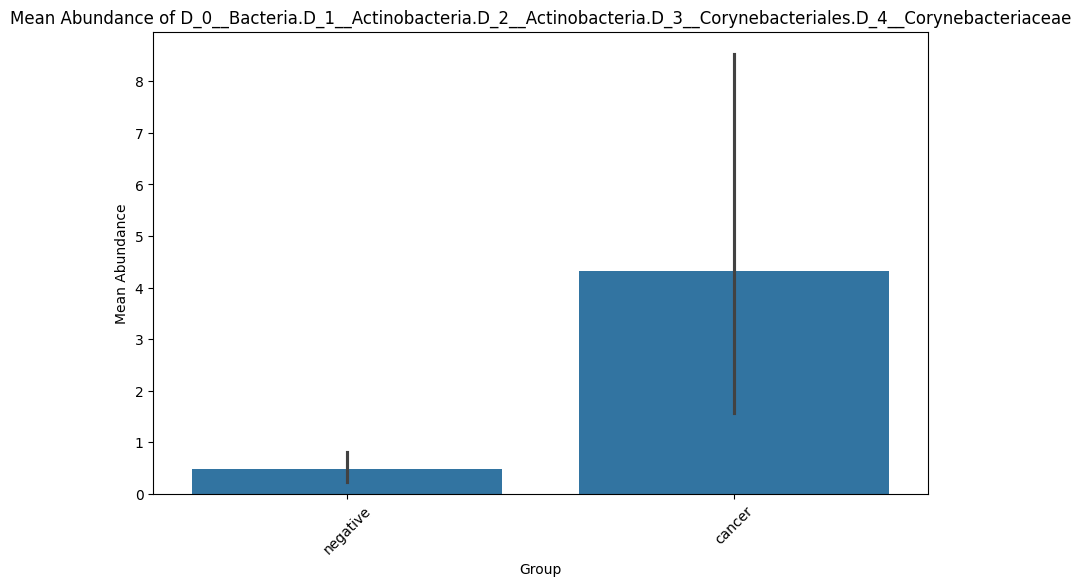

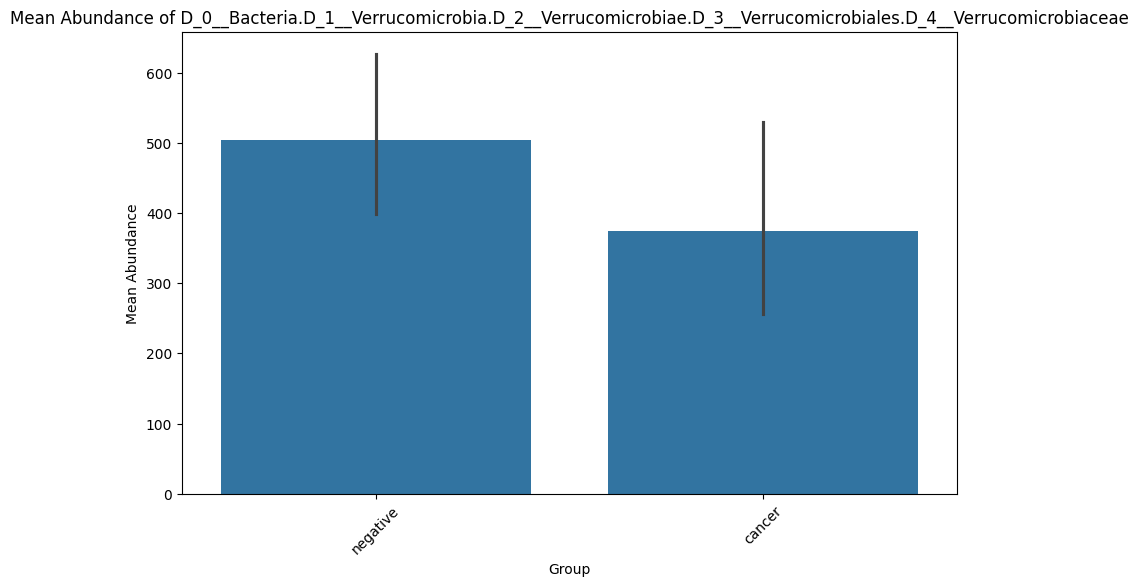

In [190]:
plot_bar(microbiome_data, metadata, feature, groups_to_compare)

CANCER VS ADENOMA

In [137]:
# Group data by 'grp' (example: 'normal_colonoscopy' vs. 'cancer')
group1 = microbiome_data[metadata['grp'] == 'cancer']
group2 = microbiome_data[metadata['grp'] == 'adenoma']

In [138]:
# Perform the test
diff_abundance_results_crc_adenoma = perform_wilcoxon(group1, group2)

# Adjust p-values for multiple testing (Bonferroni correction)
diff_abundance_results_crc_adenoma['adjusted_p-value'] = diff_abundance_results_crc_adenoma['p-value'] * len(diff_abundance_results_crc_adenoma)

# Filter significant results
significant_results_crc_adenoma = diff_abundance_results_crc_adenoma[diff_abundance_results_crc_adenoma['adjusted_p-value'] < 0.05]

# Sort by p-value
significant_results_crc_adenoma = significant_results_crc_adenoma.sort_values('adjusted_p-value')

In [191]:


significant_results_crc_adenoma.head(10)

,Feature,Statistic,p-value,adjusted_p-value
33,D_0__Bacteria.D_1__Fusobacteria.D_2__Fusobacteriia.D_3__Fusobacteriales.D_4__Fusobacteriaceae,181756.5,2.714875e-17,1.275991e-15
23,D_0__Bacteria.D_1__Firmicutes.D_2__Clostridia.D_3__Clostridiales.D_4__Family.XI,180865.0,1.208205e-13,5.678566e-12
13,D_0__Bacteria.D_1__Firmicutes.D_2__Bacilli.D_3__Bacillales.D_4__Family.XI,167667.0,4.328279e-13,2.034291e-11
24,D_0__Bacteria.D_1__Firmicutes.D_2__Clostridia.D_3__Clostridiales.D_4__Family.XIII,179953.5,4.466458e-13,2.099235e-11
12,D_0__Bacteria.D_1__Firmicutes.D_2__Bacilli.D_3__Bacillales.D_4__Family.X,167510.0,6.775198e-13,3.184343e-11
10,D_0__Bacteria.D_1__Bacteroidetes.D_2__Bacteroidia.D_3__Bacteroidales.D_4__Rikenellaceae,175003.0,3.679403e-10,1.729319e-08
20,D_0__Bacteria.D_1__Firmicutes.D_2__Clostridia.D_3__Clostridiales.D_4__Clostridiales.vadinBB60.group,171267.5,2.039606e-08,9.586146e-07
45,D_0__Bacteria.D_1__Tenericutes.D_2__Mollicutes.D_3__Mollicutes.RF9.D_4__uncultured.bacterium,169146.5,5.425647e-08,2.550054e-06
46,D_0__Bacteria.D_1__Verrucomicrobia.D_2__Verrucomicrobiae.D_3__Verrucomicrobiales.D_4__Verrucomicrobiaceae,167522.0,1.070438e-06,5.031058e-05
18,D_0__Bacteria.D_1__Firmicutes.D_2__Clostridia.D_3__Clostridiales.D_4__Christensenellaceae,167750.5,1.247675e-06,5.864074e-05


In [179]:
significant_results_crc_adenoma.head(10)

,Feature,Statistic,p-value,adjusted_p-value
33,D_0__Bacteria.D_1__Fusobacteria.D_2__Fusobacteriia.D_3__Fusobacteriales.D_4__Fusobacteriaceae,181756.5,2.714875e-17,1.275991e-15
23,D_0__Bacteria.D_1__Firmicutes.D_2__Clostridia.D_3__Clostridiales.D_4__Family.XI,180865.0,1.208205e-13,5.678566e-12
13,D_0__Bacteria.D_1__Firmicutes.D_2__Bacilli.D_3__Bacillales.D_4__Family.XI,167667.0,4.328279e-13,2.034291e-11
24,D_0__Bacteria.D_1__Firmicutes.D_2__Clostridia.D_3__Clostridiales.D_4__Family.XIII,179953.5,4.466458e-13,2.099235e-11
12,D_0__Bacteria.D_1__Firmicutes.D_2__Bacilli.D_3__Bacillales.D_4__Family.X,167510.0,6.775198e-13,3.184343e-11
10,D_0__Bacteria.D_1__Bacteroidetes.D_2__Bacteroidia.D_3__Bacteroidales.D_4__Rikenellaceae,175003.0,3.679403e-10,1.729319e-08
20,D_0__Bacteria.D_1__Firmicutes.D_2__Clostridia.D_3__Clostridiales.D_4__Clostridiales.vadinBB60.group,171267.5,2.039606e-08,9.586146e-07
45,D_0__Bacteria.D_1__Tenericutes.D_2__Mollicutes.D_3__Mollicutes.RF9.D_4__uncultured.bacterium,169146.5,5.425647e-08,2.550054e-06
46,D_0__Bacteria.D_1__Verrucomicrobia.D_2__Verrucomicrobiae.D_3__Verrucomicrobiales.D_4__Verrucomicrobiaceae,167522.0,1.070438e-06,5.031058e-05
18,D_0__Bacteria.D_1__Firmicutes.D_2__Clostridia.D_3__Clostridiales.D_4__Christensenellaceae,167750.5,1.247675e-06,5.864074e-05


In [140]:
groups_to_compare = ['cancer', 'adenoma']

In [149]:
# Visualize the top 10 significant features
feature_crc_adenoma = significant_results_crc_adenoma['Feature']


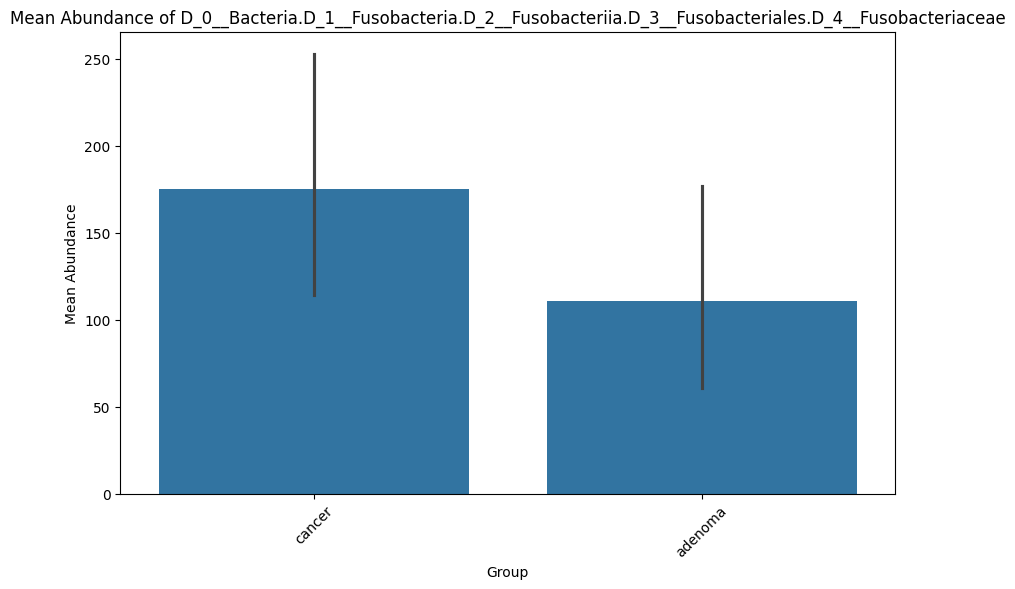

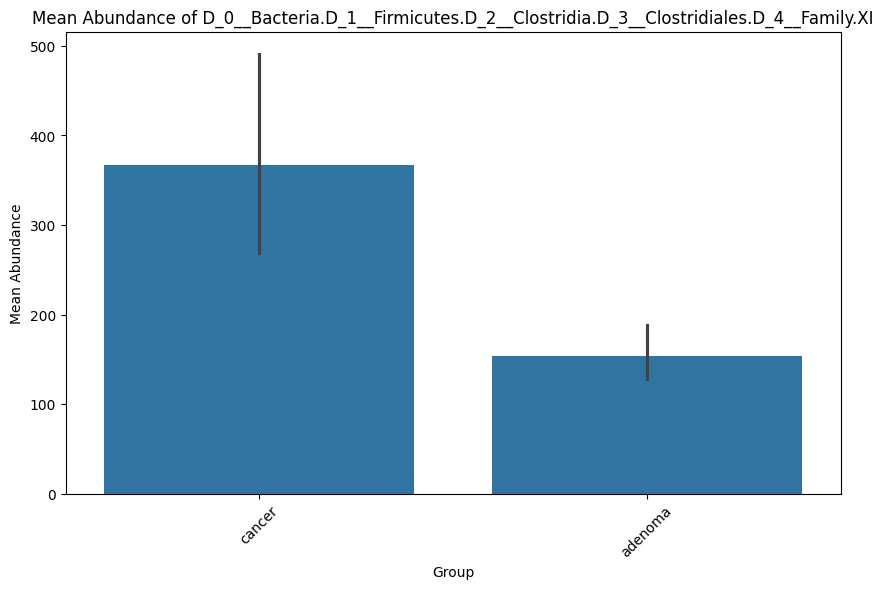

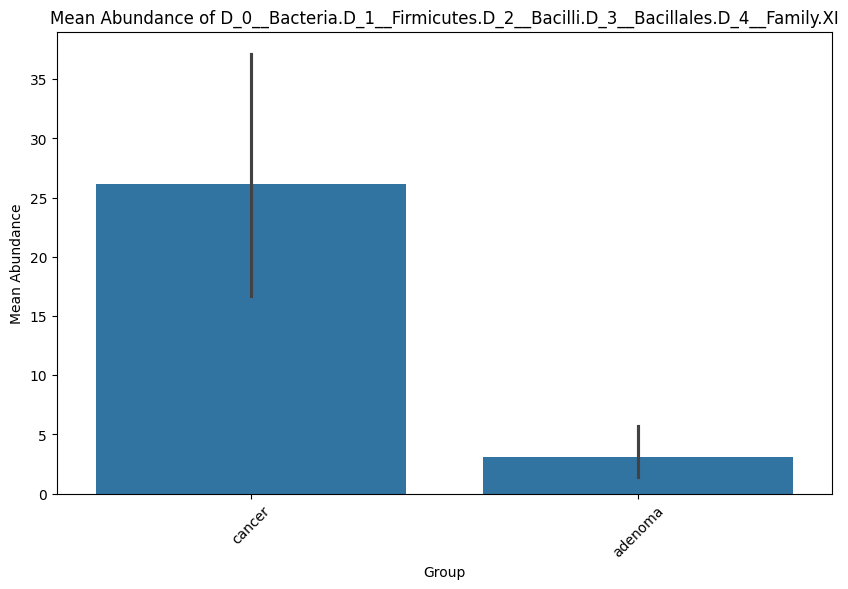

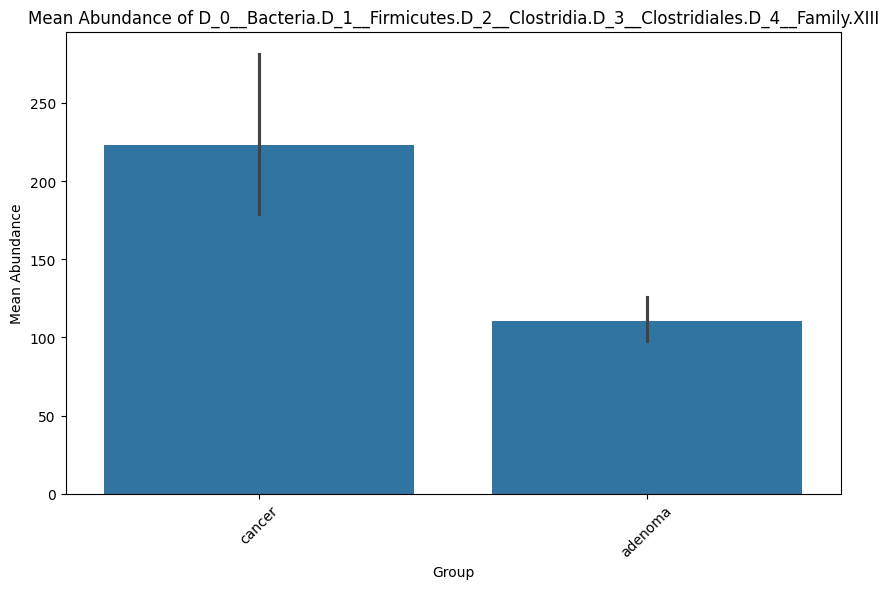

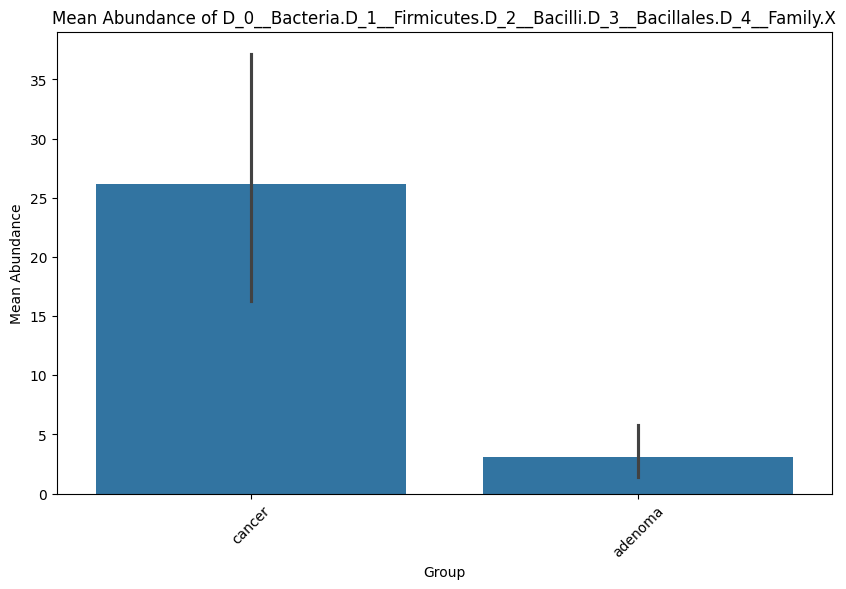

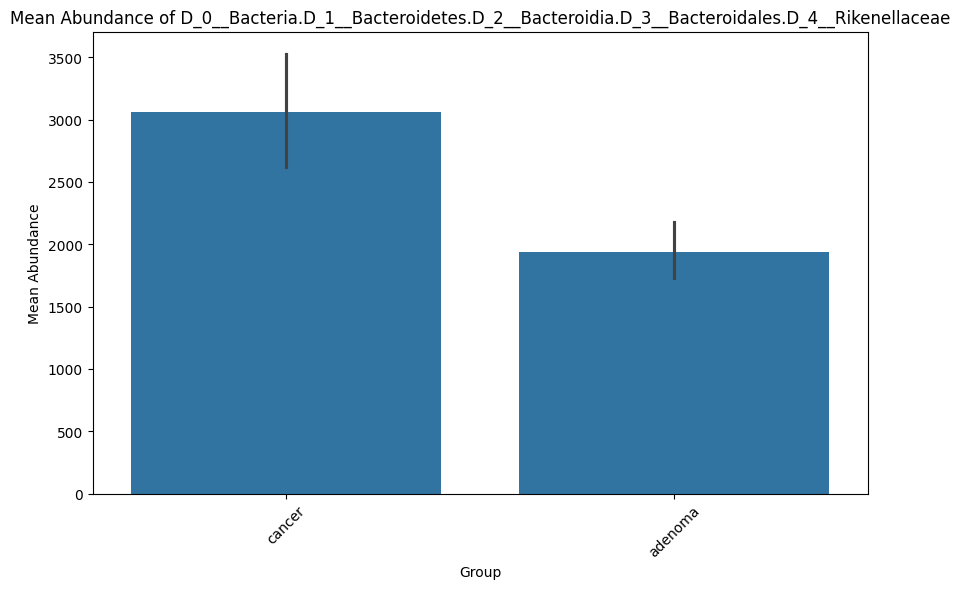

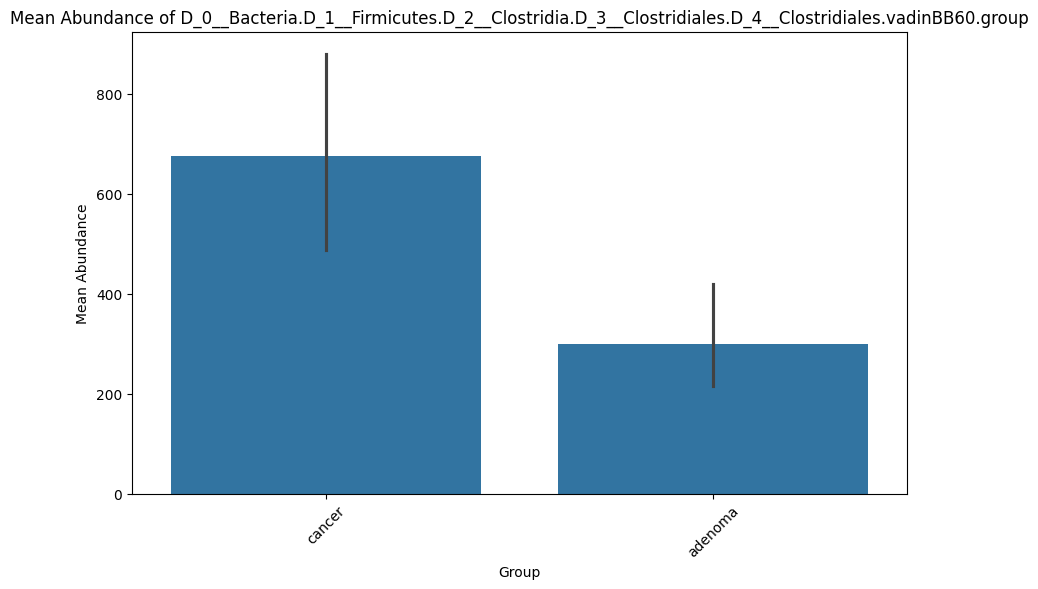

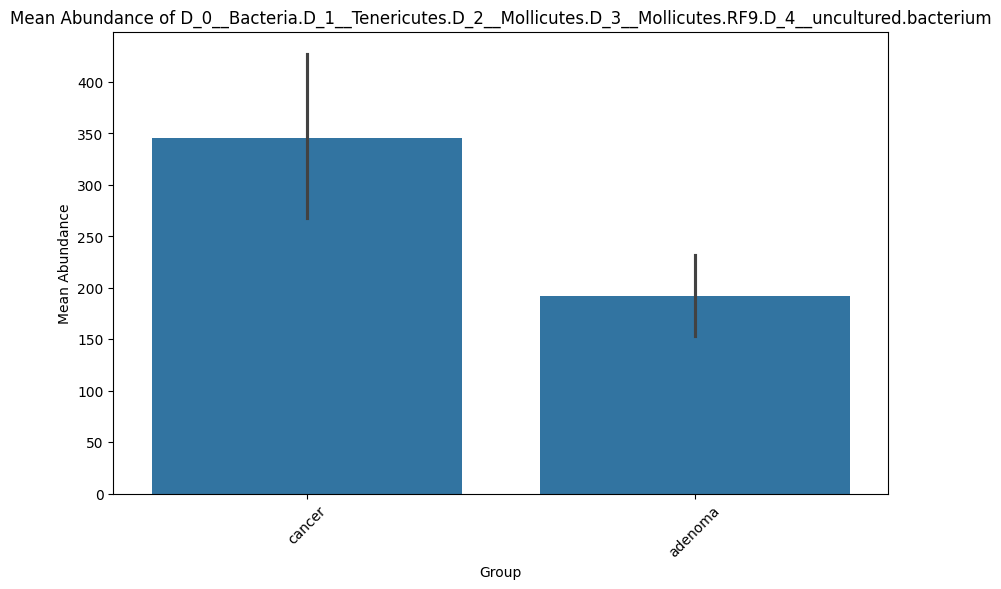

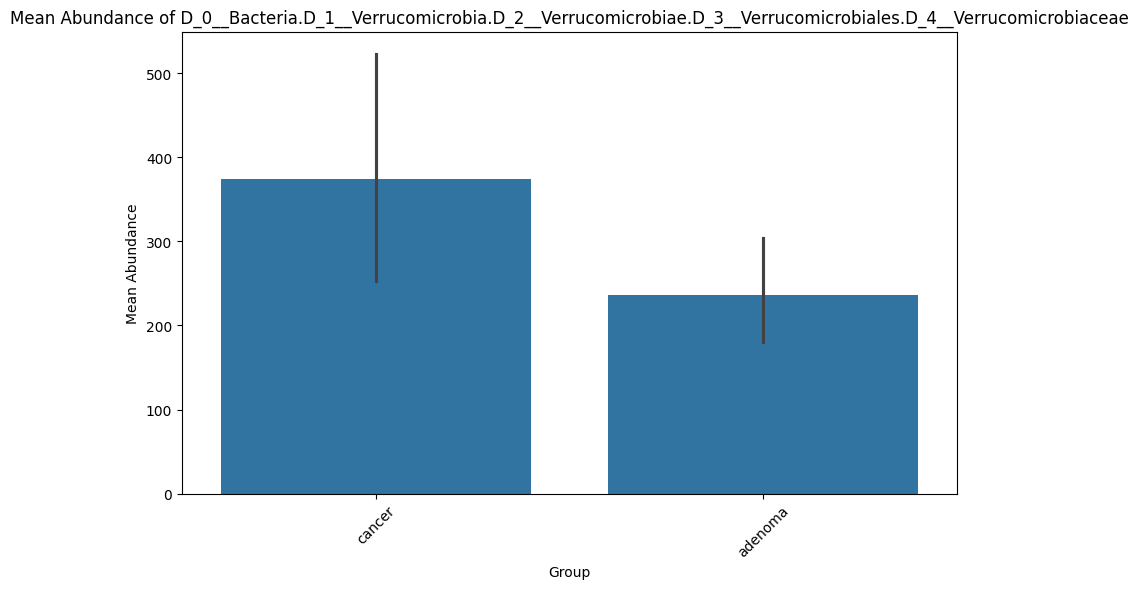

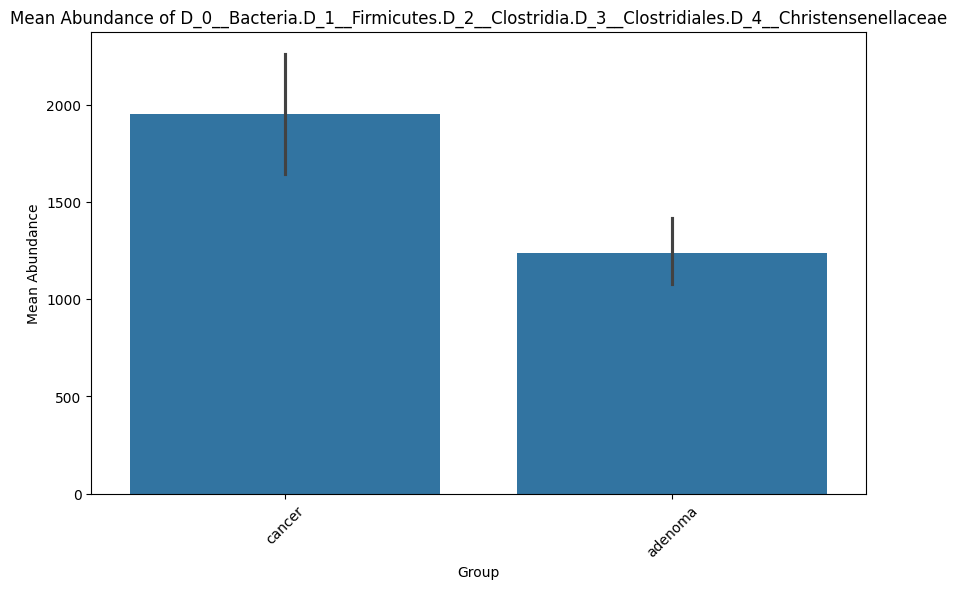

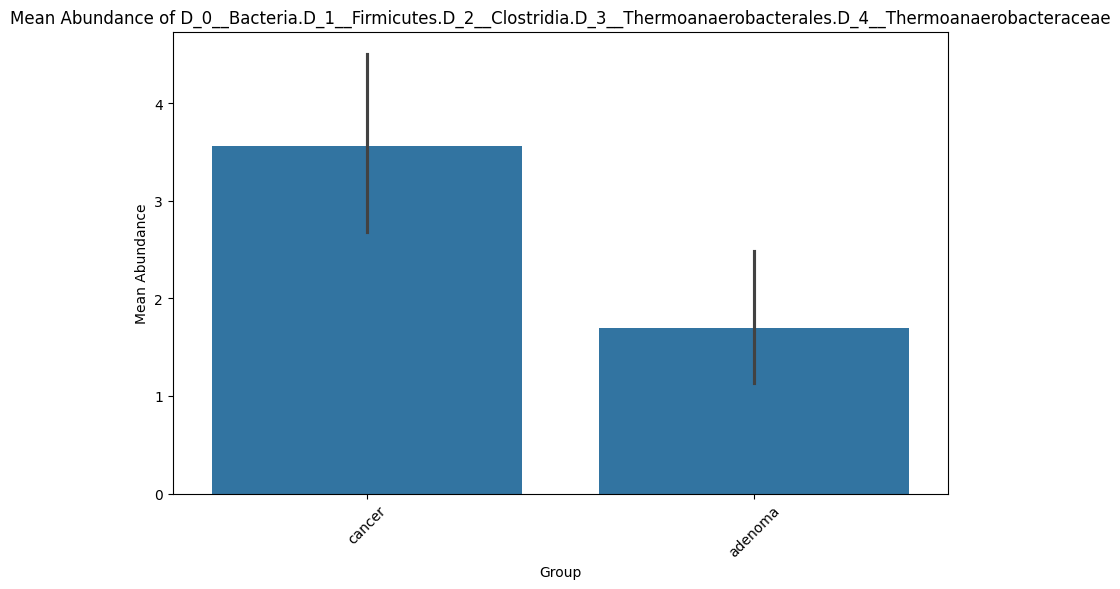

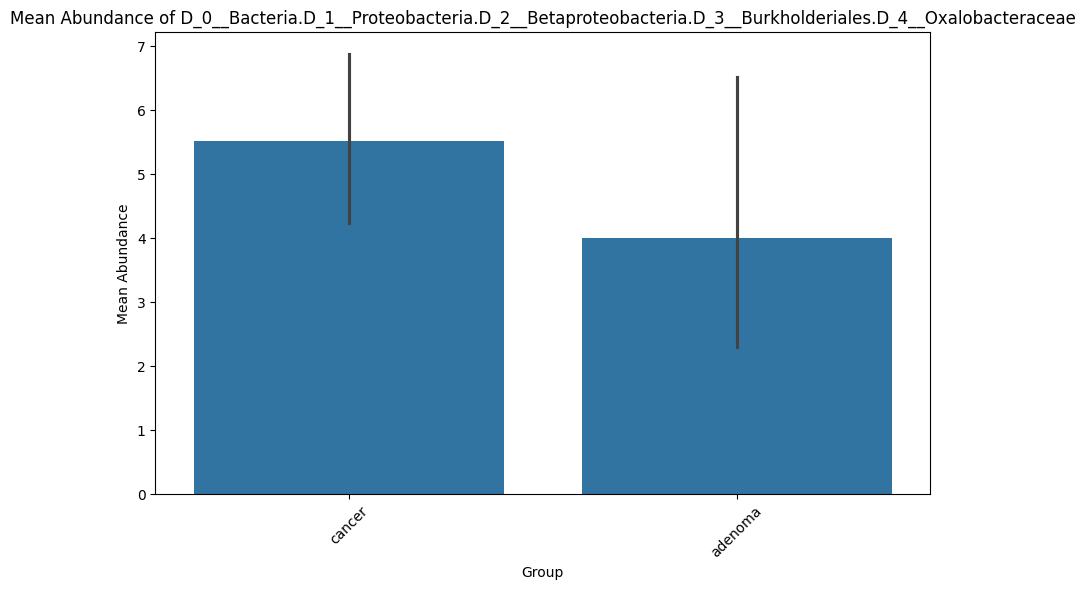

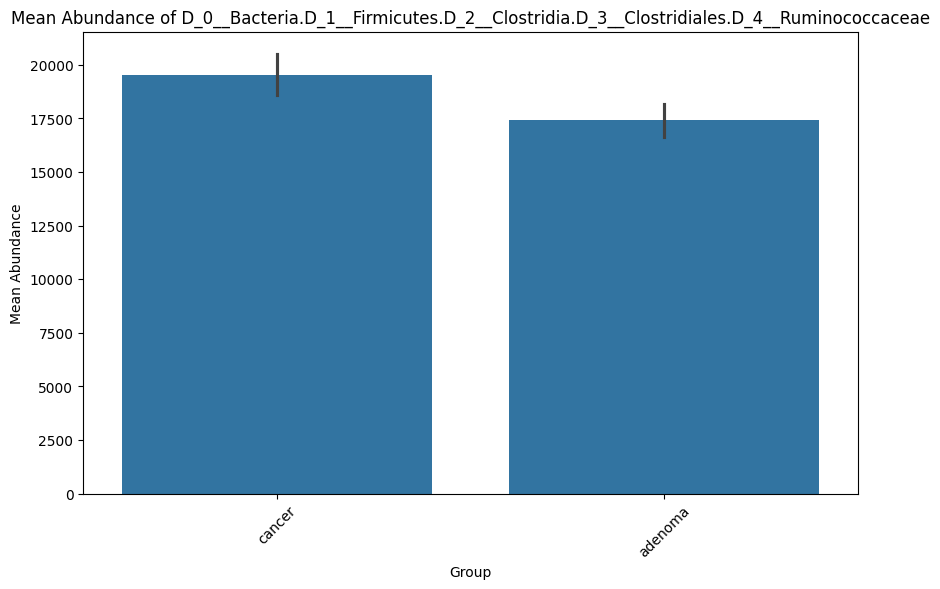

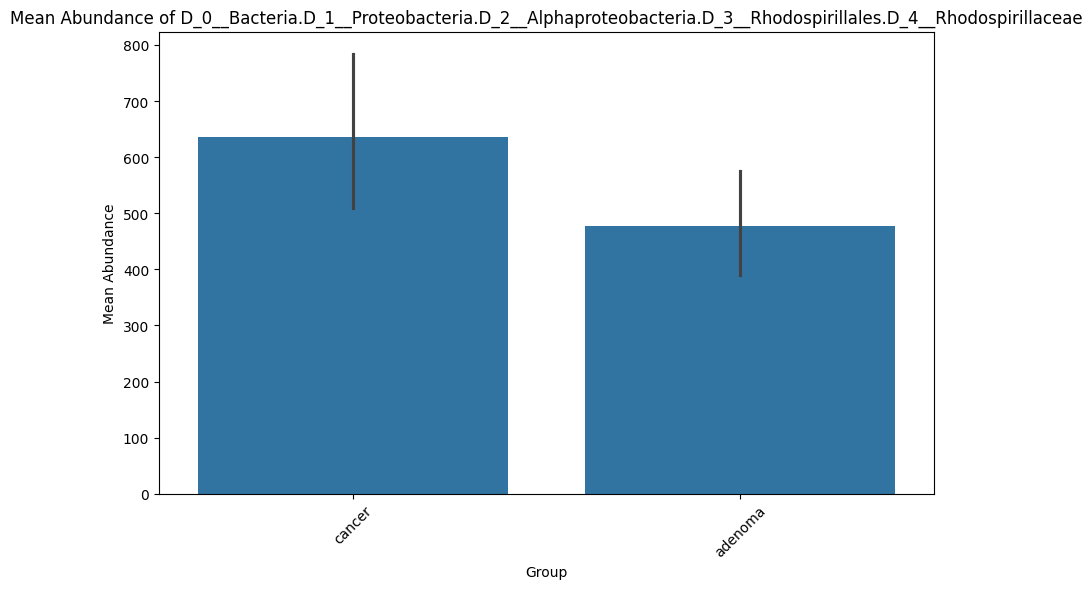

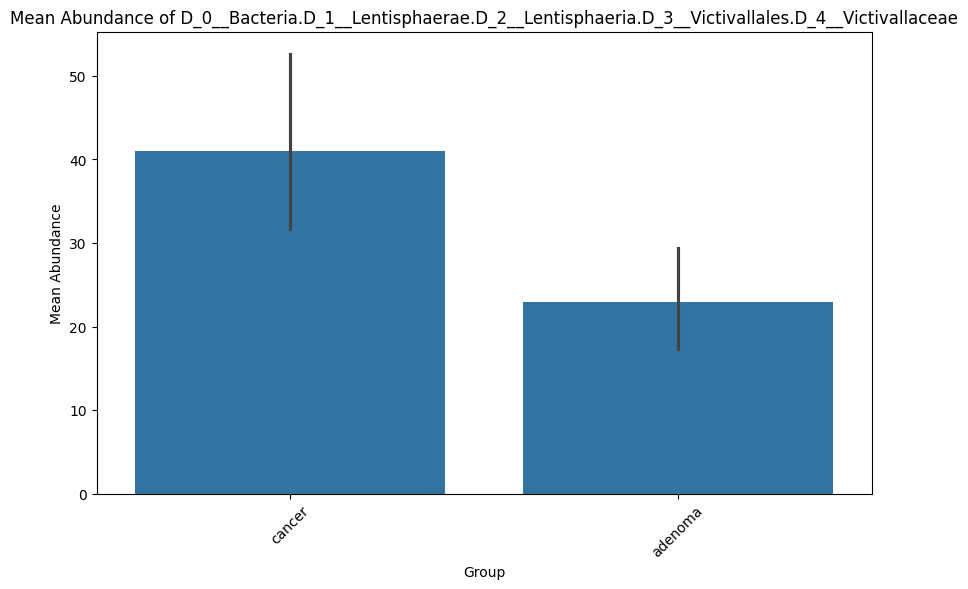

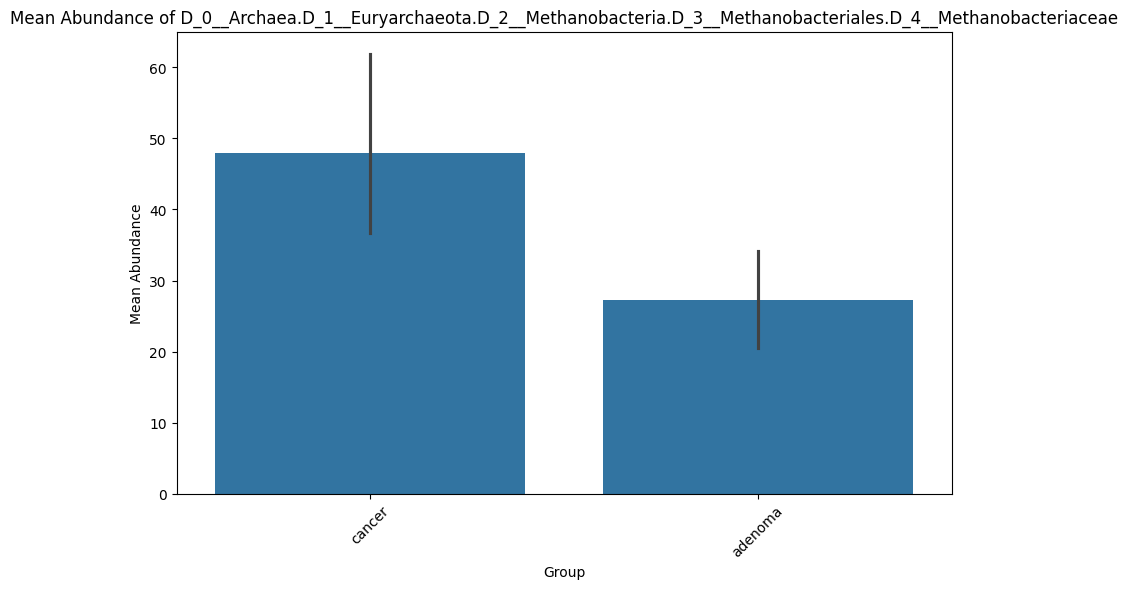

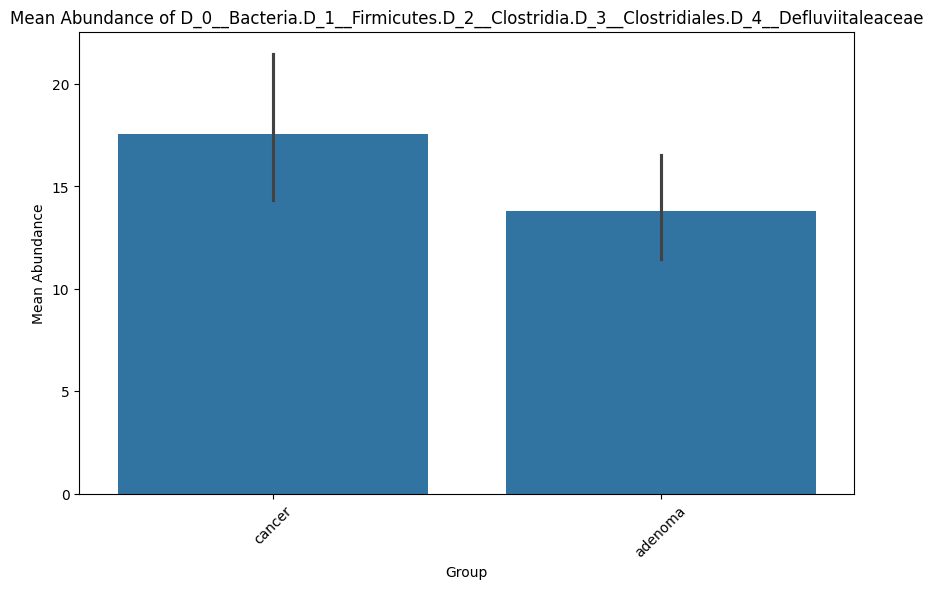

In [143]:
plot_bar(microbiome_data, metadata, feature_crc_adenoma, groups_to_compare)

ADENOMA VS NEGATIVE

In [144]:
# Group data by 'grp' (example: 'normal_colonoscopy' vs. 'cancer')
group1 = microbiome_data[metadata['grp'] == 'negative']
group2 = microbiome_data[metadata['grp'] == 'adenoma']

In [145]:
# Perform the test
diff_abundance_results_neg_adenoma = perform_wilcoxon(group1, group2)

# Adjust p-values for multiple testing (Bonferroni correction)
diff_abundance_results_neg_adenoma['adjusted_p-value'] = diff_abundance_results_neg_adenoma['p-value'] * len(diff_abundance_results_neg_adenoma)

# Filter significant results
significant_results_neg_adenoma = diff_abundance_results_neg_adenoma[diff_abundance_results_neg_adenoma['adjusted_p-value'] < 0.05]

# Sort by p-value
significant_results_neg_adenoma = significant_results_neg_adenoma.sort_values('adjusted_p-value')

In [155]:
pd.set_option('display.max_colwidth', None)
significant_results_neg_adenoma

,Feature,Statistic,p-value,adjusted_p-value
28,D_0__Bacteria.D_1__Firmicutes.D_2__Clostridia.D_3__Clostridiales.D_4__Ruminococcaceae,244549.0,1.438344e-47,6.760217e-46
20,D_0__Bacteria.D_1__Firmicutes.D_2__Clostridia.D_3__Clostridiales.D_4__Clostridiales.vadinBB60.group,221993.5,4.836920e-26,2.273352e-24
18,D_0__Bacteria.D_1__Firmicutes.D_2__Clostridia.D_3__Clostridiales.D_4__Christensenellaceae,220681.5,1.390467e-24,6.535193e-23
10,D_0__Bacteria.D_1__Bacteroidetes.D_2__Bacteroidia.D_3__Bacteroidales.D_4__Rikenellaceae,219625.5,9.549058e-24,4.488057e-22
46,D_0__Bacteria.D_1__Verrucomicrobia.D_2__Verrucomicrobiae.D_3__Verrucomicrobiales.D_4__Verrucomicrobiaceae,214635.0,2.317638e-20,1.089290e-18
38,D_0__Bacteria.D_1__Proteobacteria.D_2__Betaproteobacteria.D_3__Burkholderiales.D_4__Oxalobacteraceae,194784.0,5.012152e-15,2.355711e-13
26,D_0__Bacteria.D_1__Firmicutes.D_2__Clostridia.D_3__Clostridiales.D_4__Peptococcaceae,200296.0,5.748703e-12,2.701891e-10
24,D_0__Bacteria.D_1__Firmicutes.D_2__Clostridia.D_3__Clostridiales.D_4__Family.XIII,201778.0,6.459504e-12,3.035967e-10
45,D_0__Bacteria.D_1__Tenericutes.D_2__Mollicutes.D_3__Mollicutes.RF9.D_4__uncultured.bacterium,197597.0,9.497911e-11,4.464018e-09
29,D_0__Bacteria.D_1__Firmicutes.D_2__Clostridia.D_3__Thermoanaerobacterales.D_4__Thermoanaerobacteraceae,186250.5,1.234672e-10,5.802956e-09


In [148]:
# Visualize the significant features
feature_neg_adenoma = significant_results_neg_adenoma['Feature']


In [153]:
groups_to_compare = ['negative', 'adenoma']

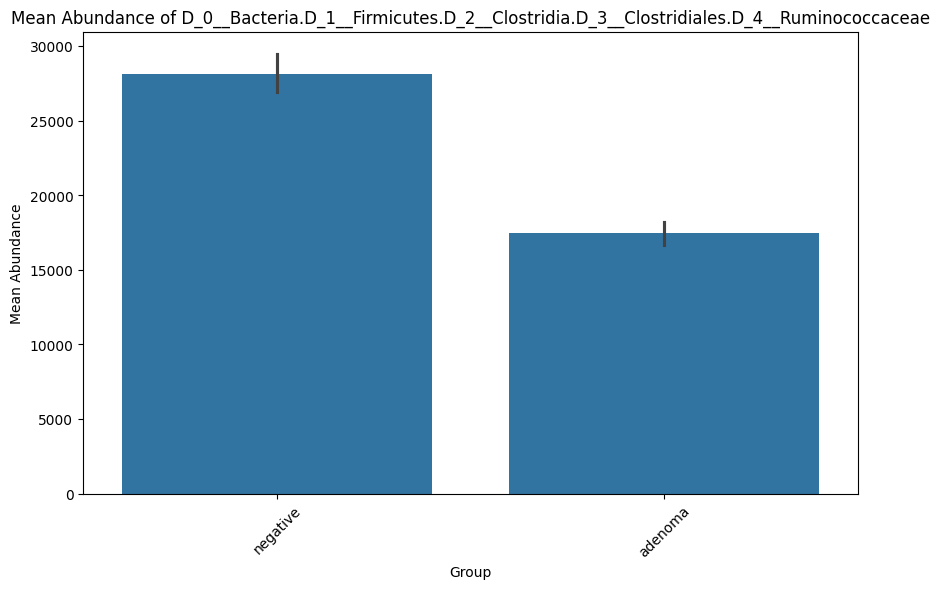

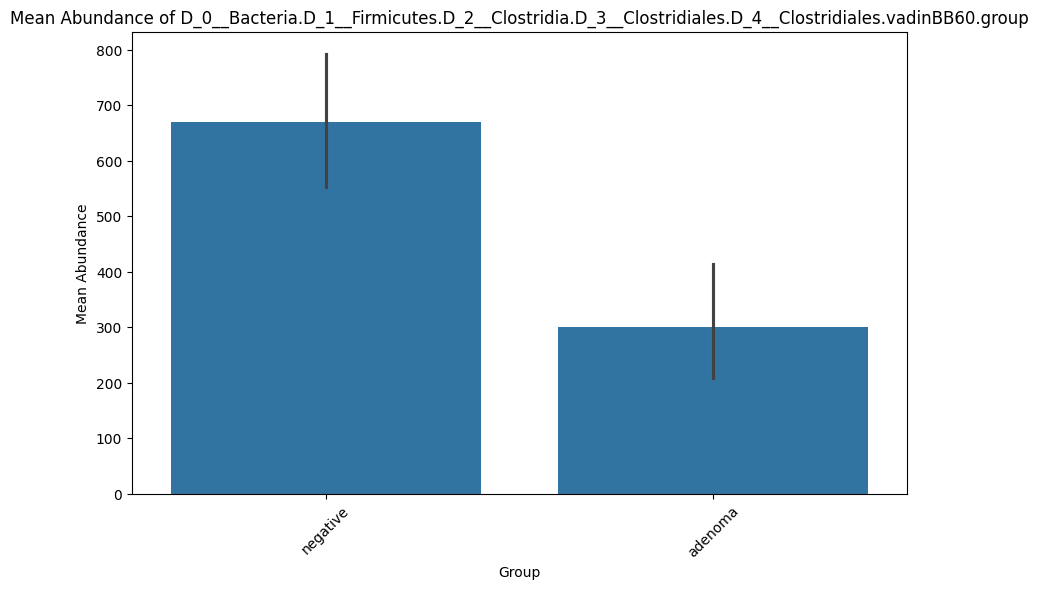

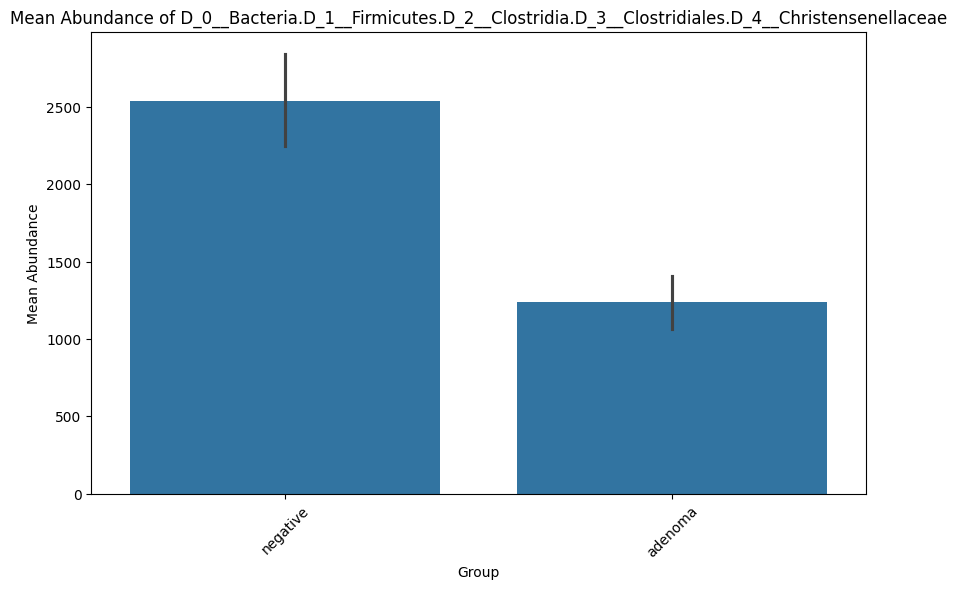

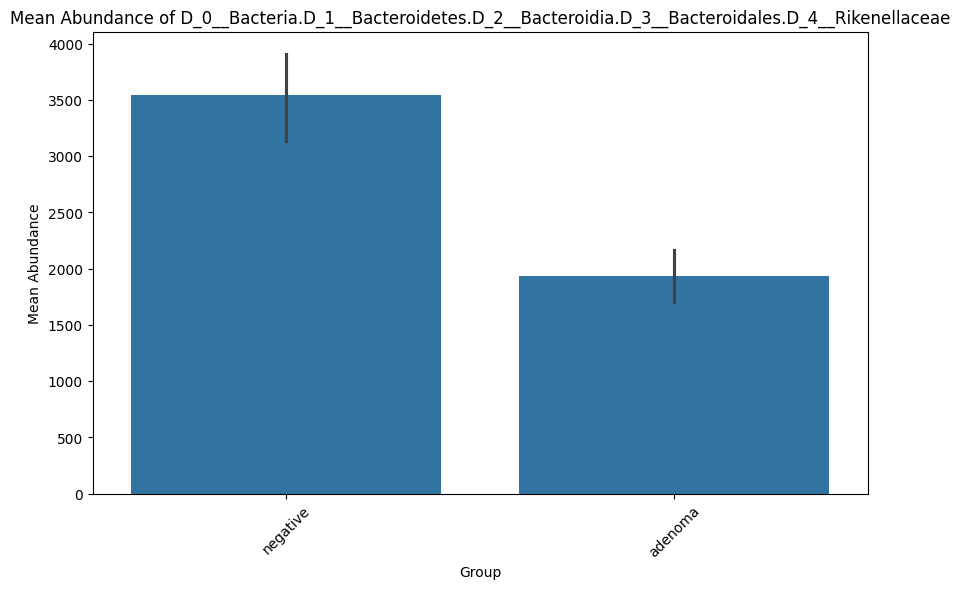

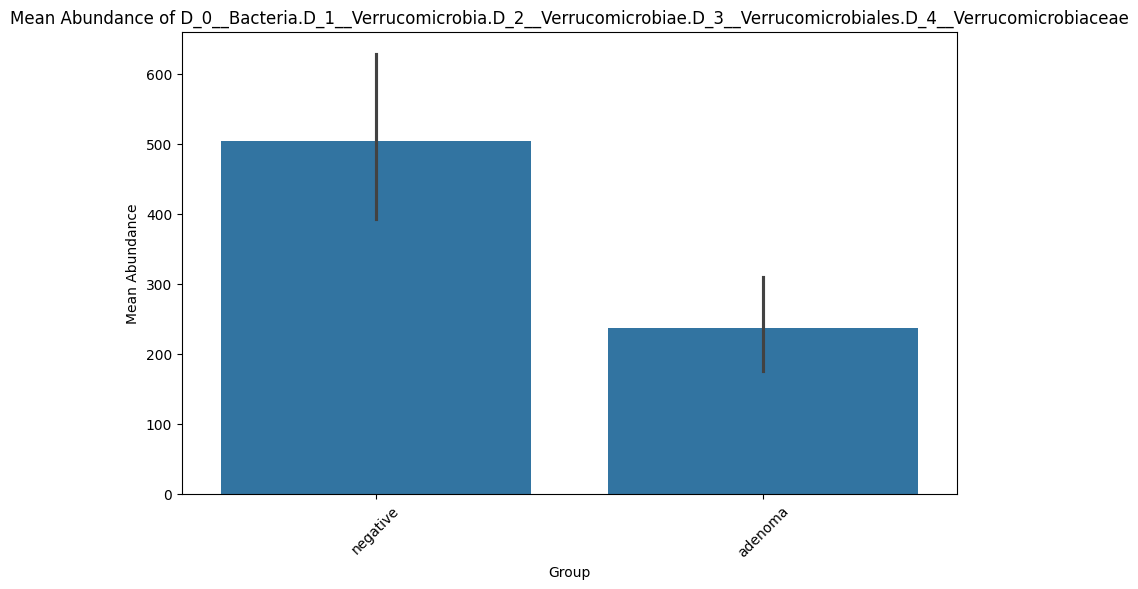

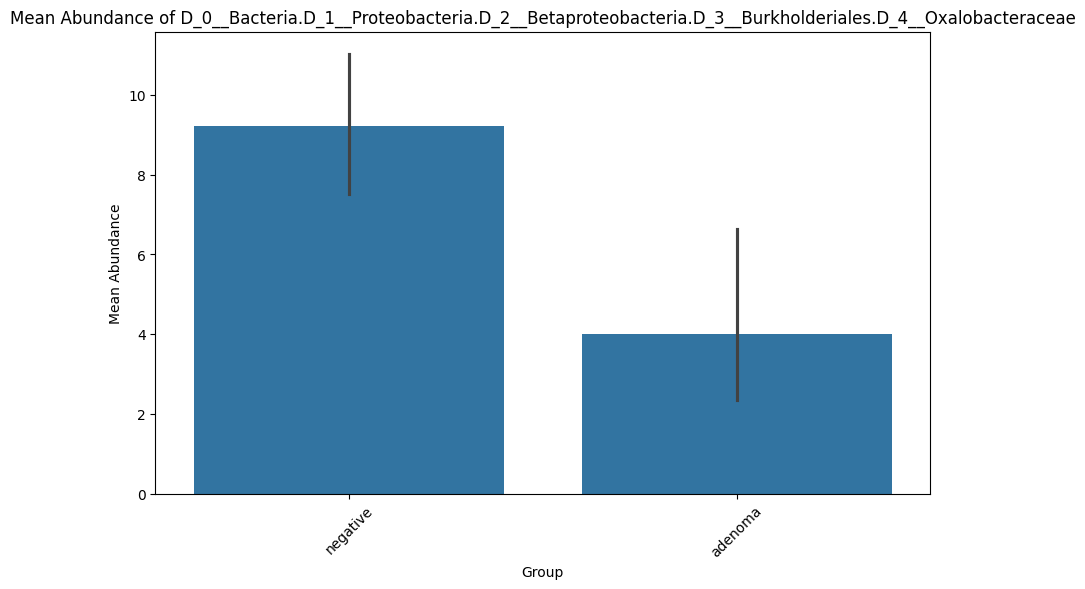

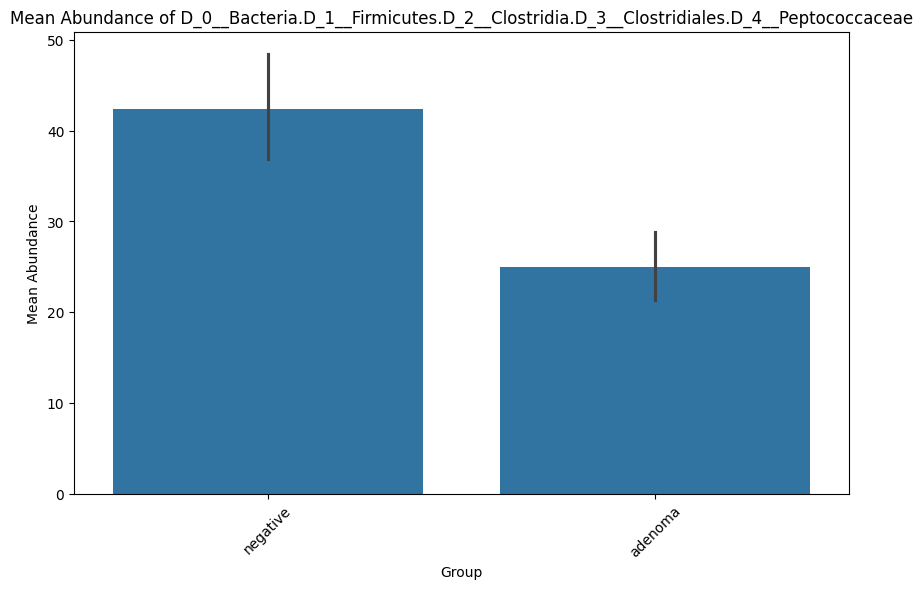

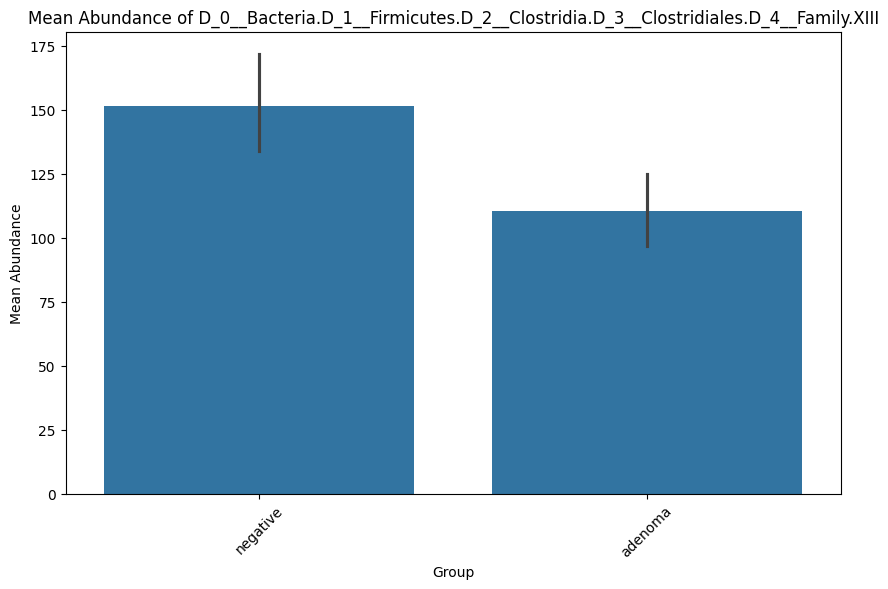

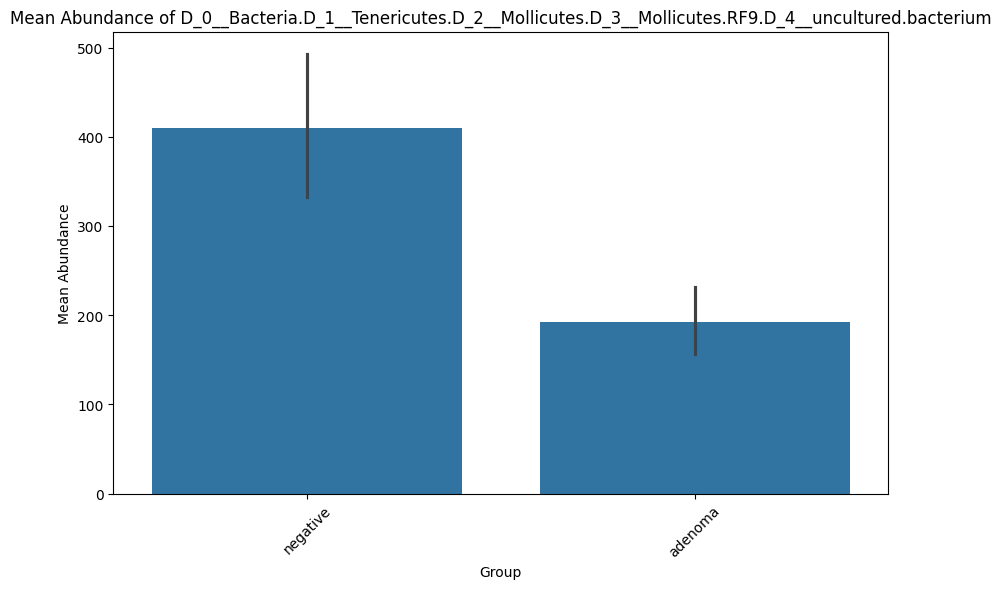

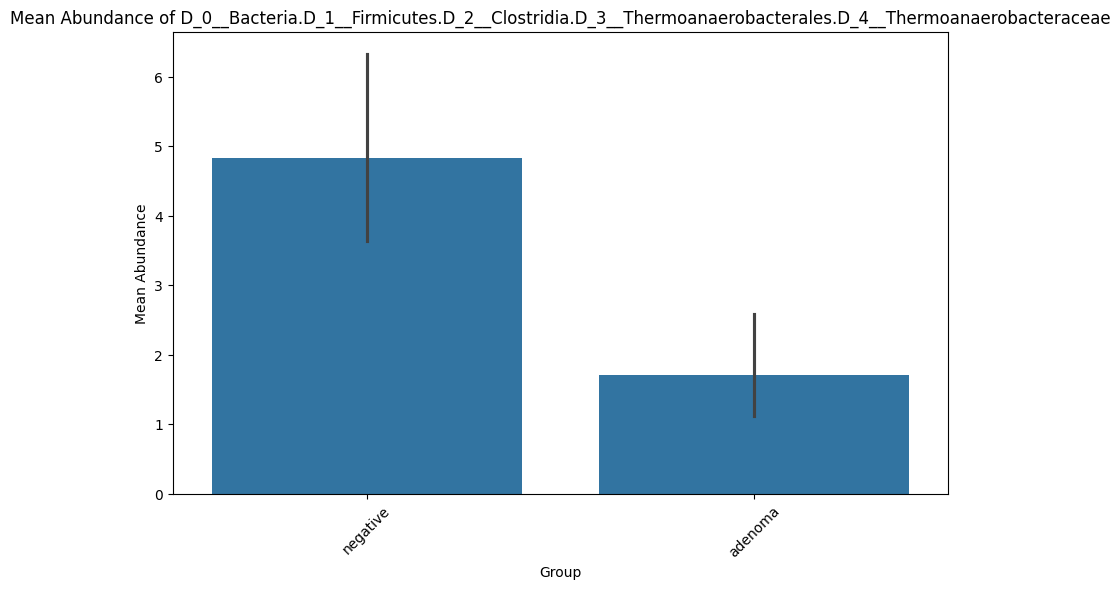

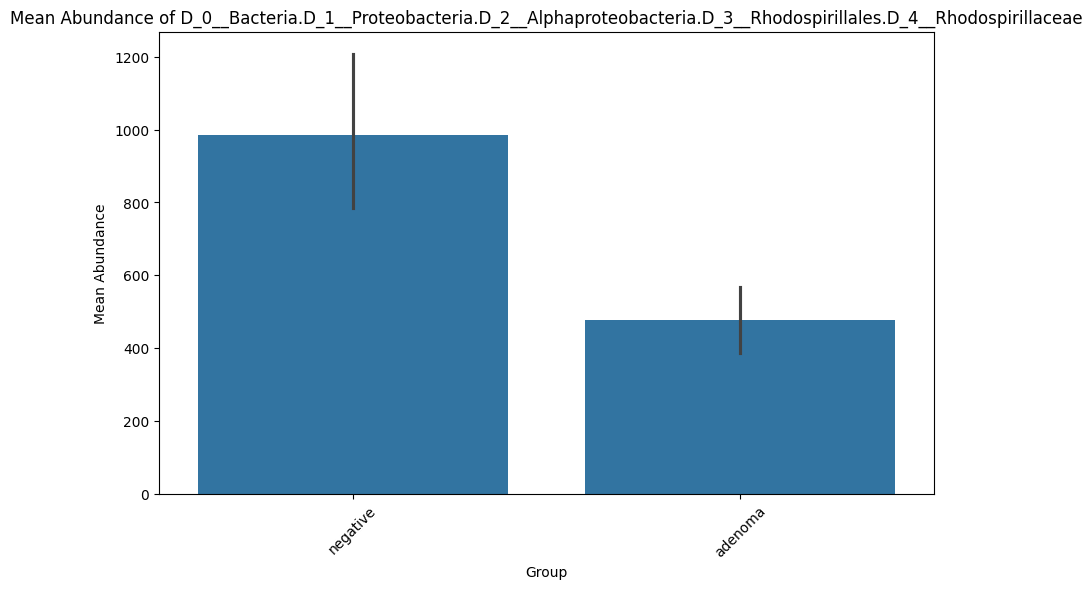

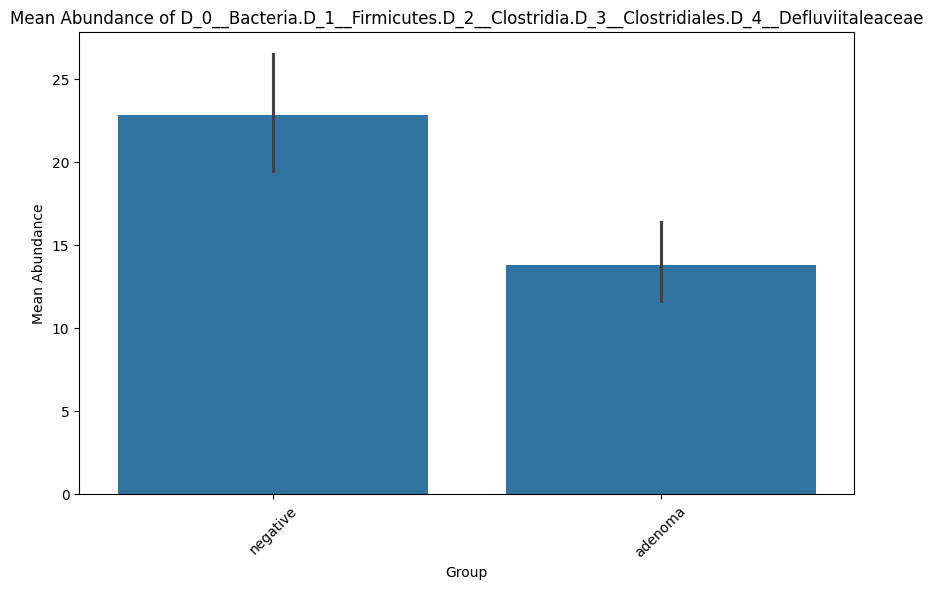

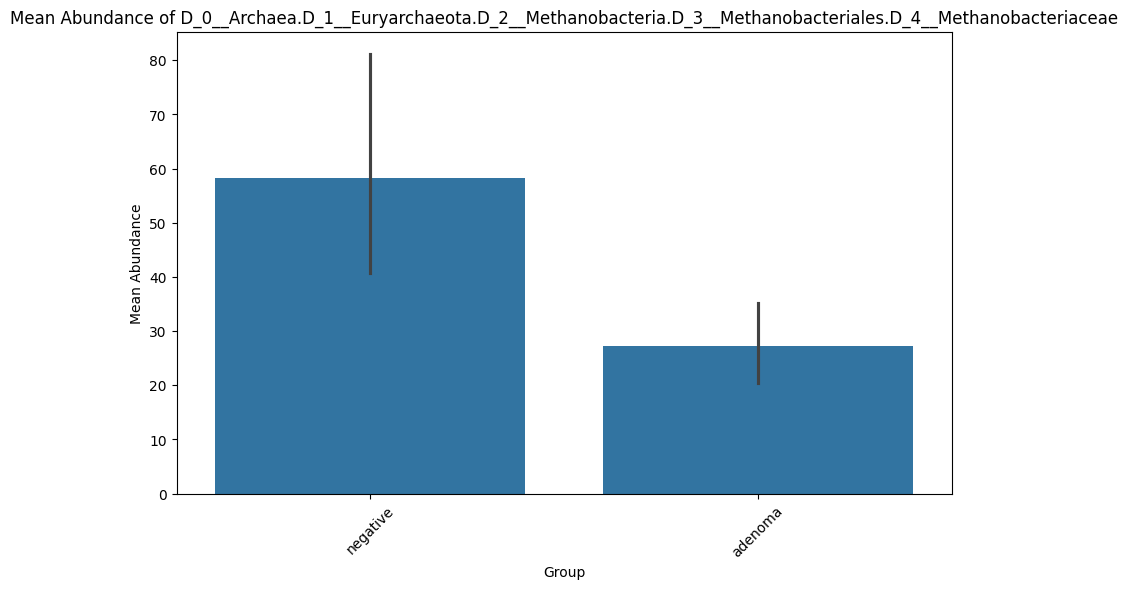

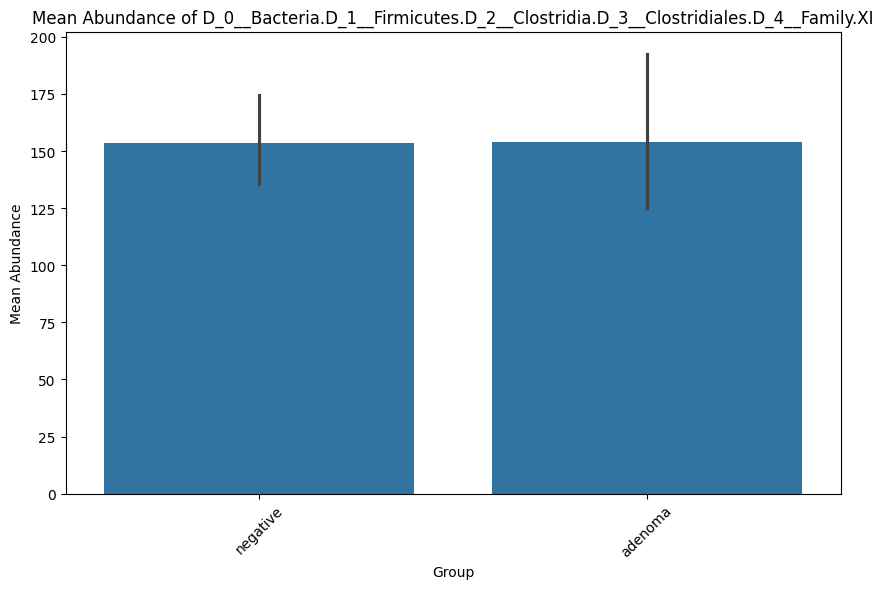

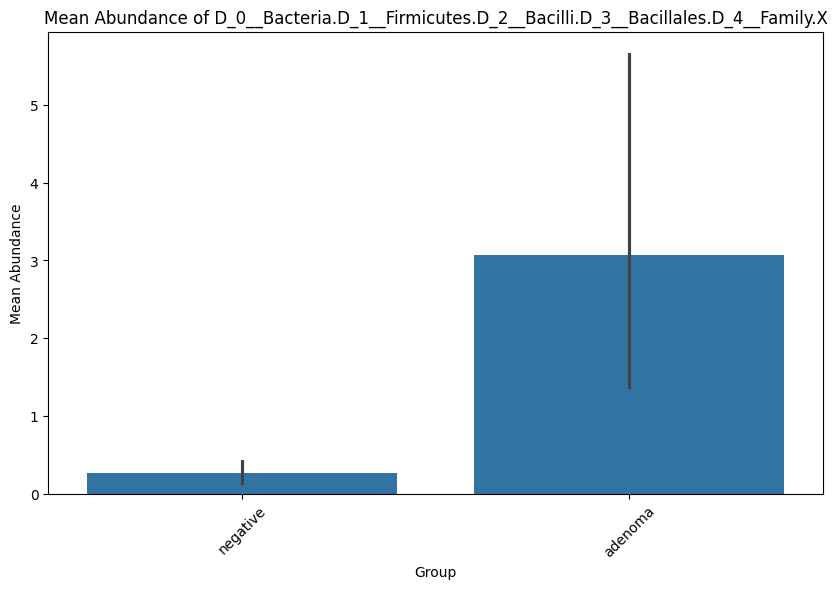

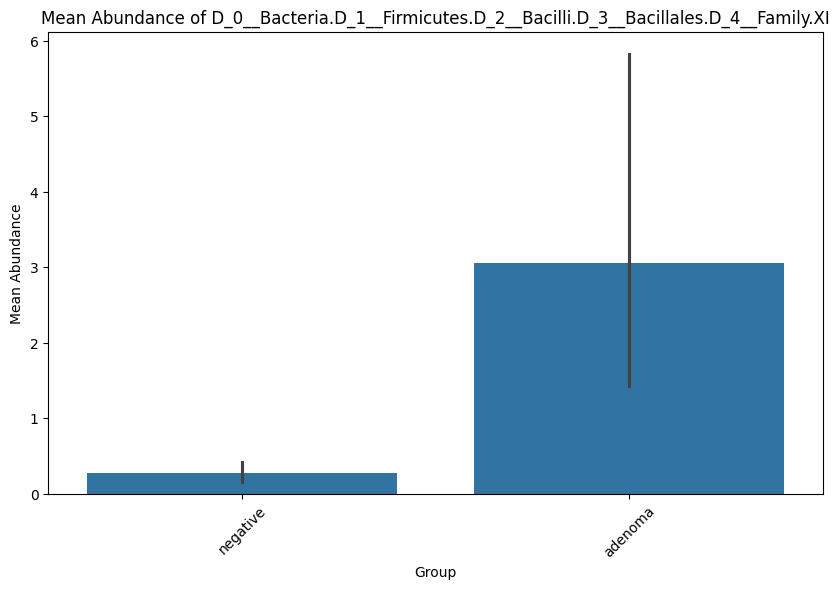

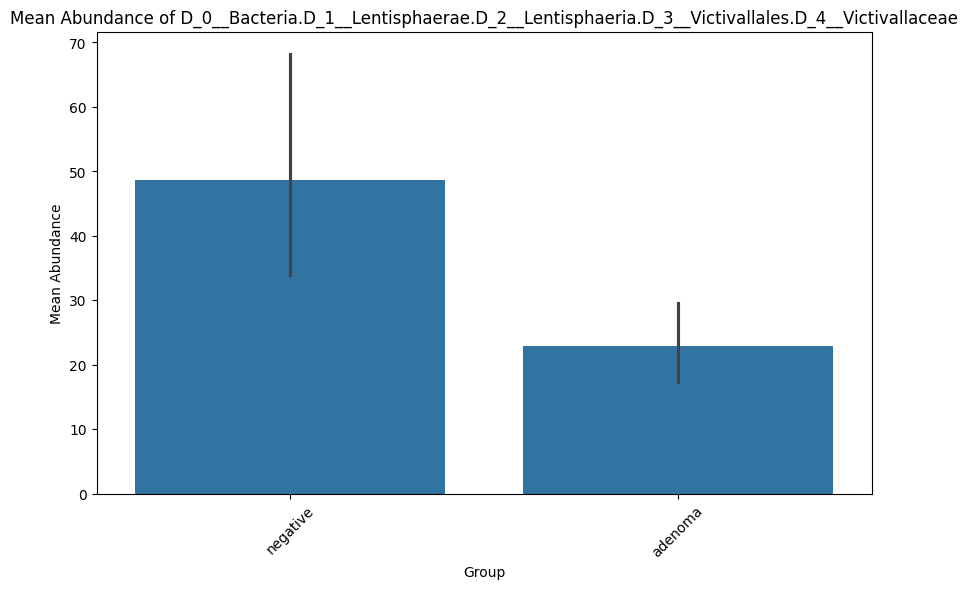

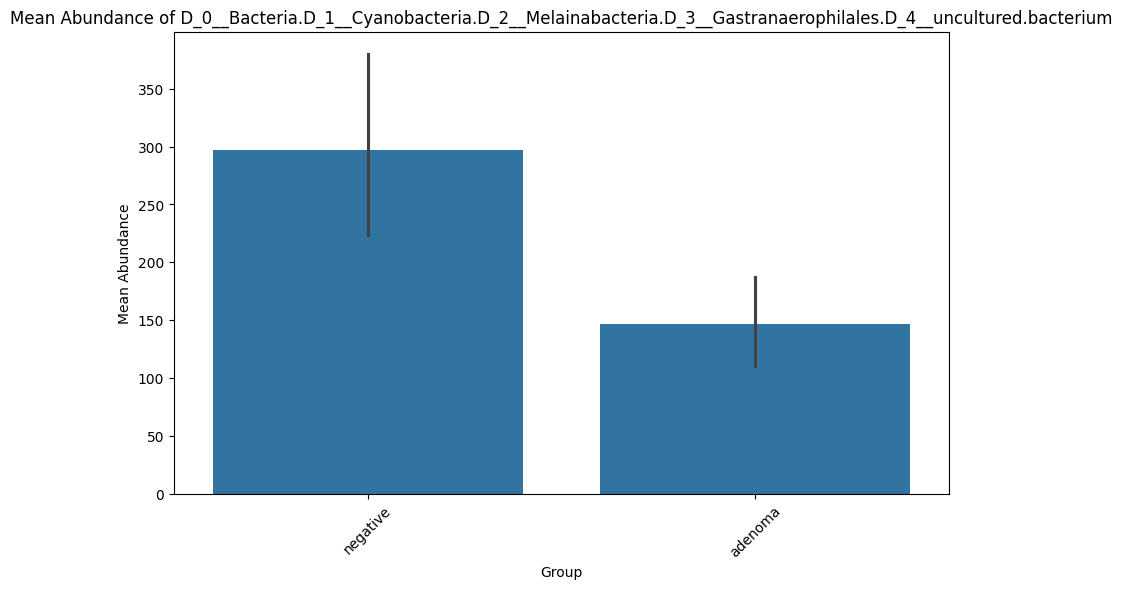

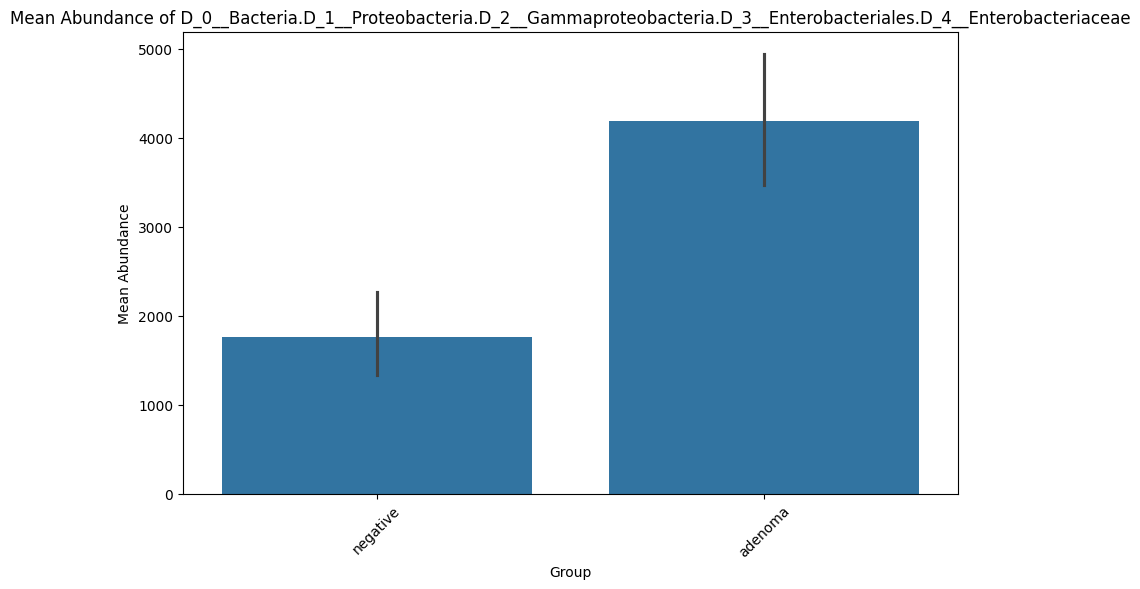

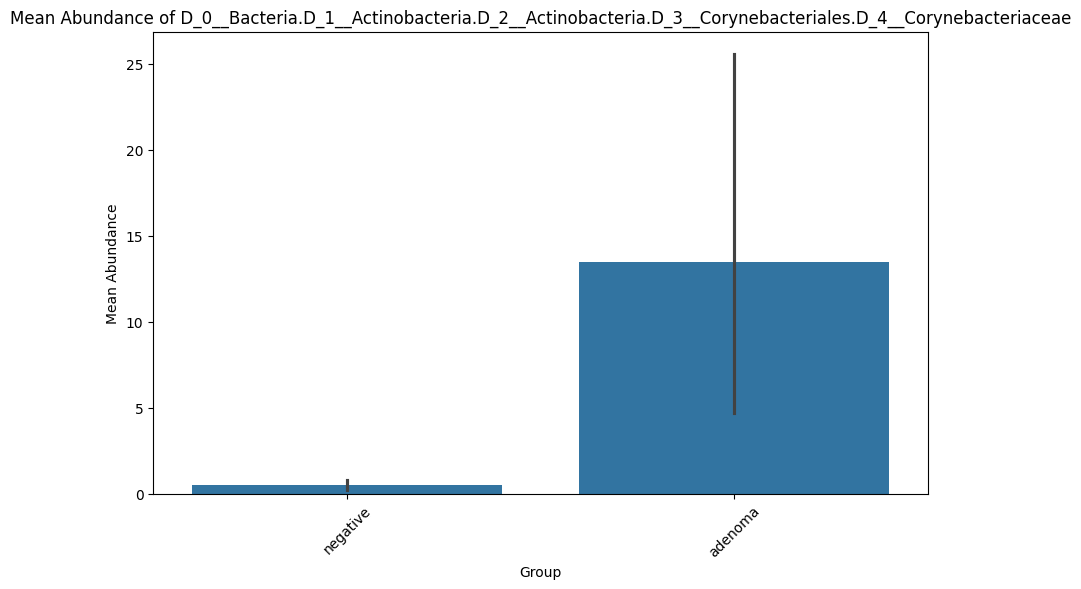

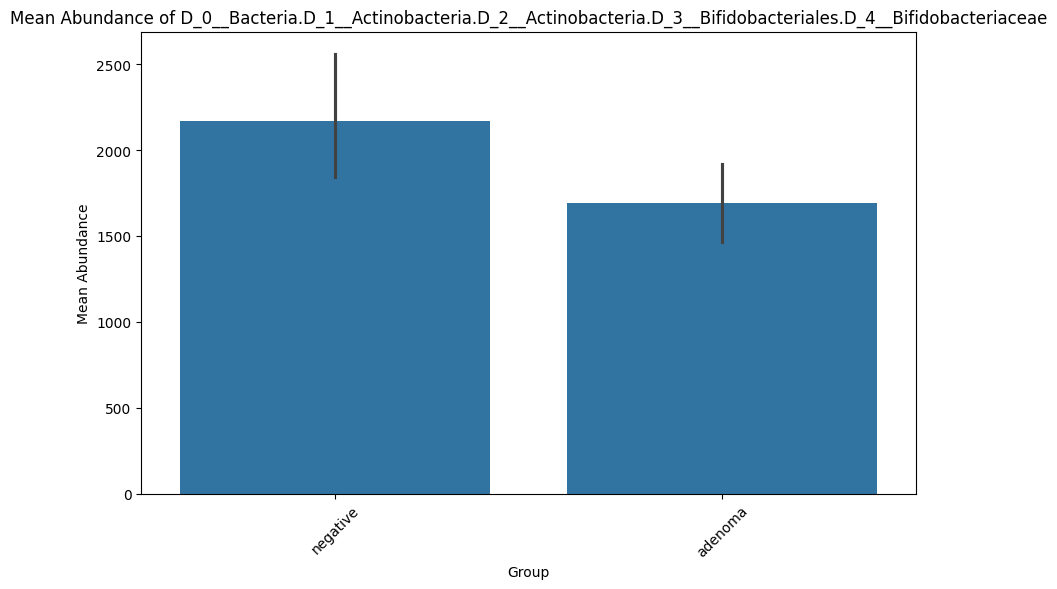

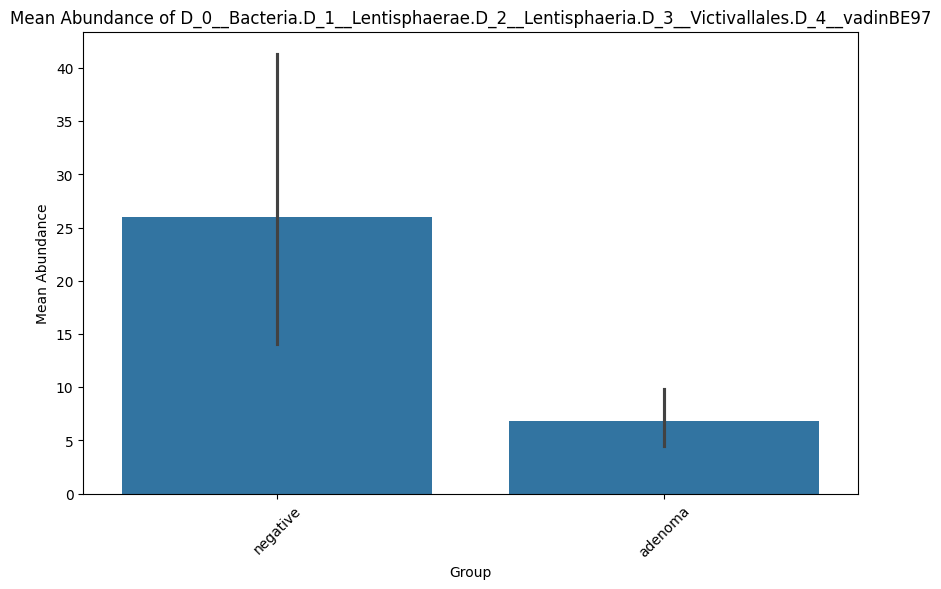

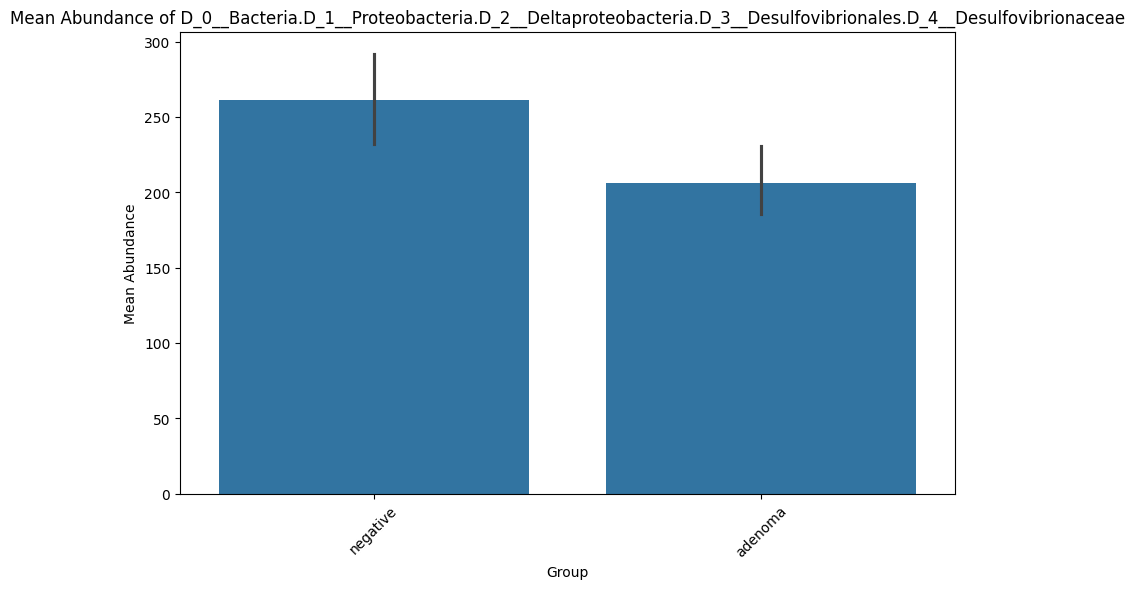

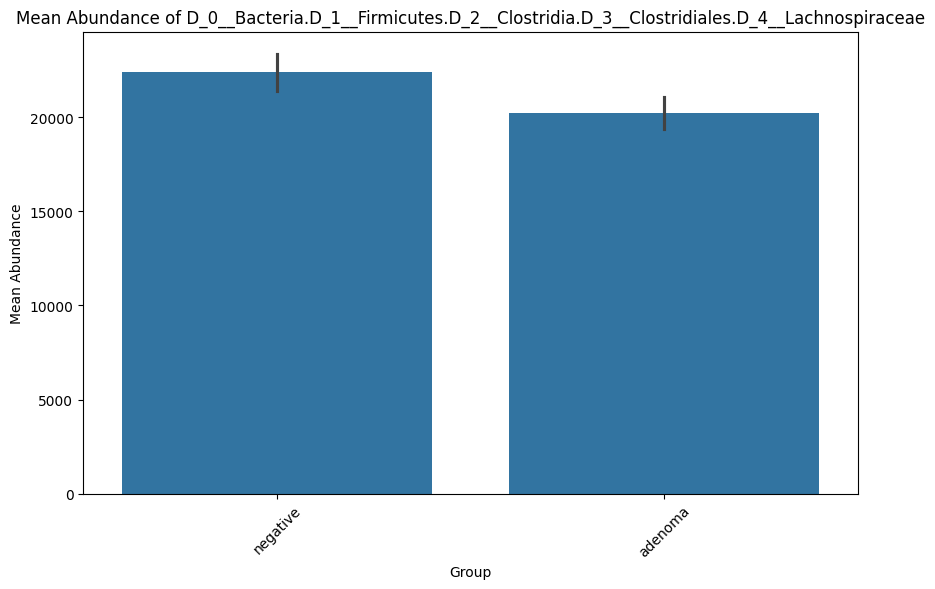

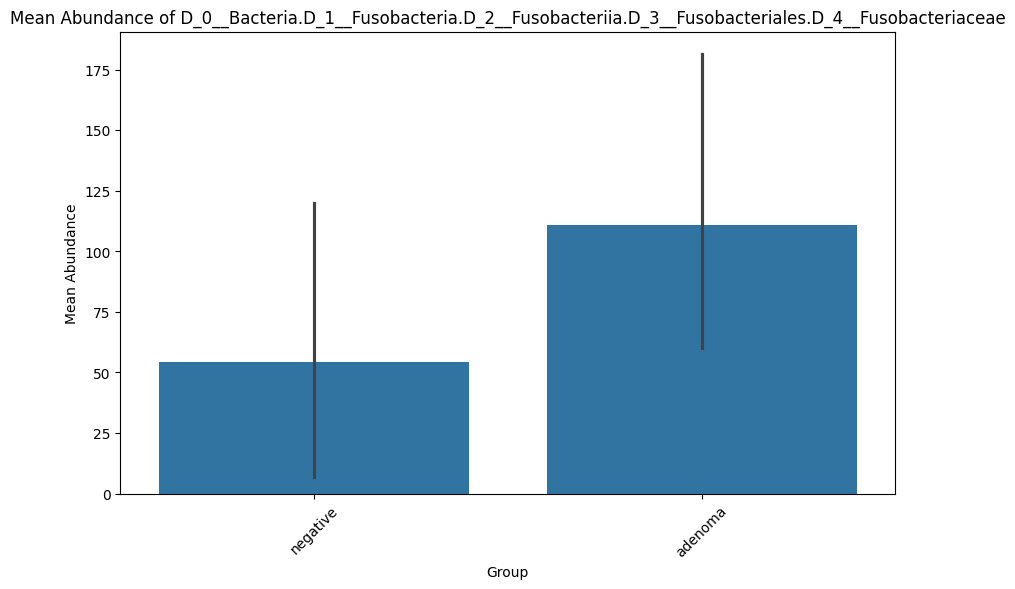

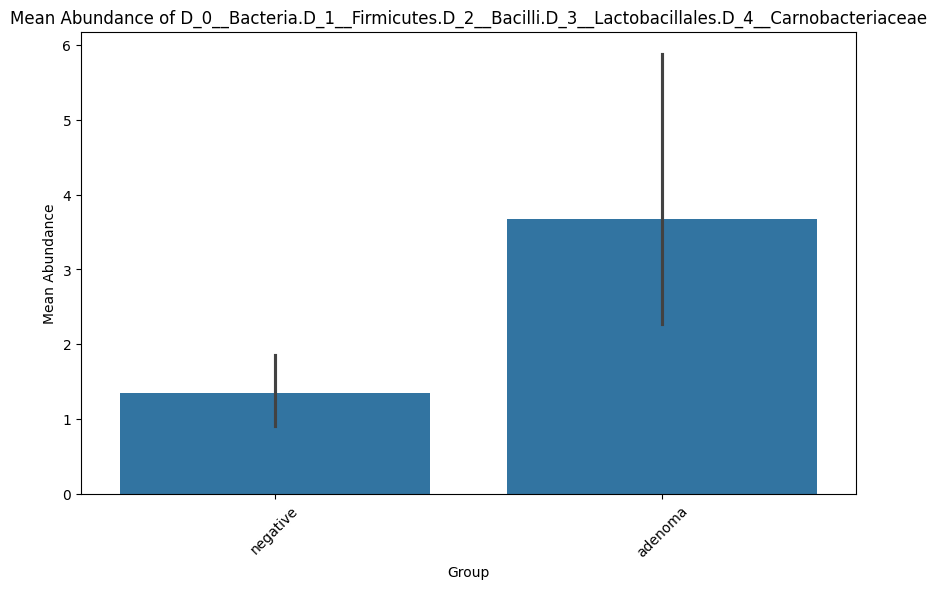

In [154]:
plot_bar(microbiome_data, metadata, feature_neg_adenoma, groups_to_compare)